## Demanda neta

# Funciones y datos

In [1]:
# Importamos librerías
import os
import warnings
import numpy                           as np
import pandas                          as pd
import geopandas                       as gpd
import xarray                          as xr
from   matplotlib        import pyplot as plt
from   scipy             import stats
from   scipy             import optimize
from   scipy             import interpolate
from   matplotlib.ticker import StrMethodFormatter

In [2]:
# Funciones trigonométricas.
def sin(x) : return np.sin(np.radians(x))
def cos(x) : return np.cos(np.radians(x))
def tan(x) : return np.tan(np.radians(x))
def asin(x): return np.arcsin(x) * 180/np.pi
def acos(x): return np.arccos(x) * 180/np.pi
def atan(x): return np.arctan(x) * 180/np.pi

# Funciones para claves de regiones eléctricas

# Clave a país
def COUNTRY_REGION(x):
    if   x == "BCA"  : y = "MEX"
    elif x == "BCS"  : y = "MEX"
    elif x == "CEN"  : y = "MEX"
    elif x == "NES"  : y = "MEX"
    elif x == "NOR"  : y = "MEX"
    elif x == "NTE"  : y = "MEX"
    elif x == "OCC"  : y = "MEX"
    elif x == "ORI"  : y = "MEX"
    elif x == "PEN"  : y = "MEX"
    elif x == "PGE"  : y = "USA"
    elif x == "SCE"  : y = "USA"
    elif x == "SDGE" : y = "USA"
    elif x == "VEA"  : y = "USA"
    elif x == "COAST": y = "USA"
    elif x == "EAST" : y = "USA"
    elif x == "FWEST": y = "USA"
    elif x == "NORTH": y = "USA"
    elif x == "NCENT": y = "USA"
    elif x == "SOUTH": y = "USA"
    elif x == "SCENT": y = "USA"
    elif x == "WEST" : y = "USA"
    elif x == "LON" : y = "VAR"
    elif x == "LAT1" : y = "VAR"
    elif x == "LAT2"  : y = "VAR"
    elif x == "TOTAL": y = "VAR"
    return y

# Clave a país
def RTO_REGION(x):
    if   x == "BCA"  : y = "CENACE"
    elif x == "BCS"  : y = "CENACE"
    elif x == "CEN"  : y = "CENACE"
    elif x == "NES"  : y = "CENACE"
    elif x == "NOR"  : y = "CENACE"
    elif x == "NTE"  : y = "CENACE"
    elif x == "OCC"  : y = "CENACE"
    elif x == "ORI"  : y = "CENACE"
    elif x == "PEN"  : y = "CENACE"
    elif x == "PGE"  : y = "CAISO"
    elif x == "SCE"  : y = "CAISO"
    elif x == "SDGE" : y = "CAISO"
    elif x == "VEA"  : y = "CAISO"
    elif x == "COAST": y = "ERCOT"
    elif x == "EAST" : y = "ERCOT"
    elif x == "FWEST": y = "ERCOT"
    elif x == "NORTH": y = "ERCOT"
    elif x == "NCENT": y = "ERCOT"
    elif x == "SOUTH": y = "ERCOT"
    elif x == "SCENT": y = "ERCOT"
    elif x == "WEST" : y = "ERCOT"
    elif x == "LON" : y = "VAR"
    elif x == "LAT1" : y = "VAR"
    elif x == "LAT2"  : y = "VAR"
    elif x == "TOTAL": y = "VAR"
    return y

3, 4, 14, 15, 16, 17, 18, 19, 20, 21

# Clave a número
def NUM_REGION(x):
    if   x == "BCA"  : y = 1
    elif x == "BCS"  : y = 2
    elif x == "CEN"  : y = 3
    elif x == "NES"  : y = 4
    elif x == "NOR"  : y = 5
    elif x == "NTE"  : y = 6
    elif x == "OCC"  : y = 7
    elif x == "ORI"  : y = 8
    elif x == "PEN"  : y = 9
    elif x == "PGE"  : y = 10
    elif x == "SCE"  : y = 11
    elif x == "SDGE" : y = 12
    elif x == "VEA"  : y = 13
    elif x == "COAST": y = 14
    elif x == "EAST" : y = 15
    elif x == "FWEST": y = 16
    elif x == "NORTH": y = 17
    elif x == "NCENT": y = 18
    elif x == "SOUTH": y = 19
    elif x == "SCENT": y = 20
    elif x == "WEST" : y = 21
    elif x == "LON" : y = 22
    elif x == "LAT1" : y = 23
    elif x == "LAT2"  : y = 24
    elif x == "TOTAL": y = 25
    return y

# Número a clave
def NUM_REGION_r(x):
    if   x == 1 : y = "BCA"
    elif x == 2 : y = "BCS"
    elif x == 3 : y = "CEN"
    elif x == 4 : y = "NES"
    elif x == 5 : y = "NOR"
    elif x == 6 : y = "NTE"
    elif x == 7 : y = "OCC"
    elif x == 8 : y = "ORI"
    elif x == 9 : y = "PEN"
    elif x == 10: y = "PGE"
    elif x == 11: y = "SCE"
    elif x == 12: y = "SDGE"
    elif x == 13: y = "VEA"
    elif x == 14: y = "COAST"
    elif x == 15: y = "EAST"
    elif x == 16: y = "FWEST"
    elif x == 17: y = "NORTH"
    elif x == 18: y = "NCENT"
    elif x == 19: y = "SOUTH"
    elif x == 20: y = "SCENT"
    elif x == 21: y = "WEST"
    elif x == 22: y = "LON"
    elif x == 23: y = "LAT1"
    elif x == 24: y = "LAT2"
    elif x == 25: y = "TOTAL"
    return y

# Número a nombre
def NAME_REGION_r(x):
    if   x == 1 : y = "Baja California"
    elif x == 2 : y = "Baja California Sur"
    elif x == 3 : y = "Centro"
    elif x == 4 : y = "Noreste"
    elif x == 5 : y = "Noroeste"
    elif x == 6 : y = "Norte"
    elif x == 7 : y = "Occidente"
    elif x == 8 : y = "Oriente"
    elif x == 9 : y = "Peninsular"
    elif x == 10: y = "Pacific G&E"
    elif x == 11: y = "Southern Cal Edison"
    elif x == 12: y = "San Diego G&E"
    elif x == 13: y = "Valley Electric Assn"
    elif x == 14: y = "Coast"
    elif x == 15: y = "East"
    elif x == 16: y = "Far West"
    elif x == 17: y = "North"
    elif x == 18: y = "North Central"
    elif x == 19: y = "South"
    elif x == 20: y = "South Central"
    elif x == 21: y = "West"
    elif x == 22: y = "Longitudinal"
    elif x == 23: y = "Latitudinal 1"
    elif x == 24: y = "Latitudinal 2"
    elif x == 25: y = "Total"
    return y

In [3]:
# Casos de orientación de sistemas fotovoltaico

# Casos a estudiar
cases = [ "south_no_track", "west_no_track", "east_no_track",
    "1_track", "2_track", "bifacial_vertical_west_main",
    "bifacial_vertical_east_main", "bifacial_vertical_west_back",
    "bifacial_vertical_east_back", "bifacial_south_back" ]
# Variables fotovoltaicas por caso
# Inclinación
track_tilt       =   [ f"{x}_Tilt"               for x in cases ]
# Azimuth
track_azimuth    =   [ f"{x}_Azimuth"            for x in cases ]
# Ángulo entre el panel y el sol, Angle of Incidence
track_AOI        =   [ f"{x}_Angle_of_Incidence" for x in cases ]
# Radiación incidente en el panel [W/m^2], Plane of Array Irradiace
track_POA        =   [ f"{x}_POA"                for x in cases ]
# Producción fotovoltaica por kilowatt de capacidad [W/kWp]
track_P_mp       = ( [ f"{x}_P_mp"               for x in cases ]
    + [ "bifacial_vertical_west_P_mp",
        "bifacial_vertical_east_P_mp",
        "bifacial_south_P_mp" ] )
# Producción para cada caso
prod_n           = track_P_mp[0:5] + track_P_mp[10:]
# Factor bifacial
P_bf = [ 1, 1, 1, 1, 1, 1, 1, 0.7, 0.7, 0.7 ]

prod_n_dist = [f"{x}_distributed" for x in prod_n]
prod_n_centr = [f"{x}_central" for x in prod_n]
prod_n_total = [f"{x}_total" for x in prod_n]
prod_n_i = prod_n + prod_n_dist + prod_n_centr + prod_n_total

In [4]:
# Datos de radiación

# Rutas de archivos
dir_r = "../results/"
ds_c = xr.open_dataset(f"{dir_r}full_disc_region_2022.nc")
ds_c["timezone_round"] = np.around(ds_c["timezone"]).astype(int)
for t in np.unique(ds_c["timezone_round"]): ds_c = xr.where(
    ds_c["timezone_round"] == t, ds_c.shift({"time": t}), ds_c )
ds_c

<xarray.Dataset> Size: 35MB
Dimensions:                                  (REGION: 25, time: 8760)
Coordinates:
  * REGION                                   (REGION) float64 200B 1.0 ... 25.0
  * time                                     (time) datetime64[ns] 70kB 2022-...
Data variables: (12/40)
    south_no_track_P_mp                      (REGION, time) float32 876kB 0.0...
    west_no_track_P_mp                       (REGION, time) float32 876kB 0.0...
    east_no_track_P_mp                       (REGION, time) float32 876kB 0.0...
    1_track_P_mp                             (REGION, time) float32 876kB 0.0...
    2_track_P_mp                             (REGION, time) float32 876kB 0.0...
    bifacial_vertical_west_P_mp              (REGION, time) float32 876kB 0.0...
    ...                                       ...
    1_track_P_mp_total                       (REGION, time) float32 876kB 0.0...
    2_track_P_mp_total                       (REGION, time) float32 876kB 0.0...
    bifacial_vertical_west_P_mp_total        (REGION, time) float32 876kB 0.0...
    bifacial_vertical_east_P_mp_total        (REGION, time) float32 876kB 0.0...
    bifacial_south_P_mp_total                (REGION, time) float32 876kB 0.0...
    timezone_round                           (REGION) int64 200B -8 -7 ... -6 -7

# Demanda

In [5]:
# Cargamos la demanda

# CENACE
# Ruta de la demanda para México
path_d = "../data/Demanda/"
path_f = f"{path_d}Mexico/Original/"
# Cargamos cada archivo
df_i = []
files = os.listdir(path_f)
files.sort()
for f in files:
    if f[0] != ".":
        df_0 = pd.read_csv(path_f + f, skiprows = 8,
            na_values = "               ---" )
        # Asignamos columnas
        df_0.columns = ["Sistema", "Area", "Hora", "Generacion (MWh)",
            "Importacion Total (MWh)", "Exportacion Total (MWh)",
            "Intercambio neto entre Gerencias (MWh)",
            "Estimacion de Demanda por Balance (MWh)"]
        df_0 = df_0[ ["Sistema", "Area", "Hora",
            "Estimacion de Demanda por Balance (MWh)"] ]
        df_0["Area"] = df_0["Area"].where(
            df_0["Area"]!="BCA", df_0["Sistema"] )
        df_0 = df_0.drop(columns = "Sistema")
        # Damos formato a la fecha
        df_0["Fecha"] = f[40:50]
        df_i.append(df_0)
df_cenace = pd.concat(df_i)
df_i = []
for c in df_cenace["Area"].unique():
    df_i.append(df_cenace[df_cenace["Area"] == c].copy())
for i in range(len(df_i)):
    df_i[i]["time"] = pd.date_range("2022-01-01", periods = 8760, freq = "h")
demanda = "Estimacion de Demanda por Balance (MWh)"
df_cenace = pd.concat(df_i).rename( columns =
    {demanda: "Demand", "Area": "REGION"} )
df_cenace["REGION"] = df_cenace["REGION"].apply(NUM_REGION)
df_cenace = df_cenace.set_index(["REGION", "time"]).drop(
    columns = ["Fecha", "Hora"]).sort_index()
# Interpolamos para rellenar el apagón en Yucatán
a = df_cenace.iloc[74214: 74220].values
df_cenace.iloc[74214: 74220] = interpolate.CubicSpline([0, 1, 4, 5],
    a[[0, 1, 4, 5]])([0, 1, 2, 3, 4, 5])

# ERCOT
path_ercot = f"{path_d}ERCOT/Native_Load_2022.xlsx"
df_ercot = pd.read_excel(path_ercot)
df_ercot["time"] = pd.date_range("2022-01-01", periods = 8760, freq = "h")
df_ercot = df_ercot.set_index("time").drop(columns = ["Hour Ending", "ERCOT"])
df_ercot = df_ercot.stack().reset_index(level = 1).rename(
    columns = {"level_1": "REGION", 0: "Demand"})
df_ercot["REGION"] = df_ercot["REGION"].apply(NUM_REGION)
df_ercot = df_ercot.set_index("REGION", append = True
    ).swaplevel("REGION", "time")
# Interpolamos para rellenar el apagón en Far West
a = df_ercot.iloc[65298:65298+8*6:8].values
df_ercot.iloc[65298:65298+8*6:8] = interpolate.CubicSpline([0, 1, 4, 5],
    a[[0, 1, 4, 5]])([0, 1, 2, 3, 4, 5])

#CAISO
path_caiso = f"{path_d}CAISO/historicalemshourlyload-2022.xlsx"
df_caiso = pd.read_excel(path_caiso)
df_caiso["time"] = pd.date_range("2022-01-01", periods = 8760, freq = "h")
df_caiso = df_caiso.set_index("time").drop(columns = ["Date", "HR", "CAISO"])
df_caiso = df_caiso.stack().reset_index(level = 1).rename(
    columns = {"level_1": "REGION", 0: "Demand"})
df_caiso["REGION"] = df_caiso["REGION"].apply(NUM_REGION)
df_caiso = df_caiso.set_index("REGION", append = True
    ).swaplevel("REGION", "time")

# Unimos las regiones
ds_d = pd.concat( [df_ercot, df_caiso, df_cenace]
    ).sort_index().to_xarray()

ds_d["timezone_round"] = ds_c["timezone_round"]
# Datos agregados para generación
# Agrupamiento longitudinal
ds_i = ds_d.where(ds_d["REGION"].isin([1, 2, 4, 5, 6, 14, 19]))
for t in np.unique(ds_i["timezone_round"]): 
    if not np.isnan(t): ds_i = xr.where(
        ds_i["timezone_round"] == t, ds_i.shift({"time": -(int(t)+8)}), ds_i )
ds_i["REGION"] = ds_i["REGION"].where(ds_i["REGION"] == 22, 22)
ds_d_1 = ds_i.groupby("REGION").sum()
# Agrupamiento latitudinal 1
ds_i = ds_d.where(ds_d["REGION"].isin([1, 2, 10, 11, 12, 13]))
for t in np.unique(ds_i["timezone_round"]): 
    if not np.isnan(t): ds_i = xr.where(
        ds_i["timezone_round"] == t, ds_i.shift({"time": -(int(t)+8)}), ds_i )
ds_i["REGION"] = ds_i["REGION"].where(ds_i["REGION"] == 23, 23)
ds_d_2 = ds_i.groupby("REGION").sum()
# Agrupamiento latitudinal 2
ds_i = ds_d.where(ds_d["REGION"].isin([3, 4, 14, 15, 16, 17, 18, 19, 20, 21]))
for t in np.unique(ds_i["timezone_round"]): 
    if not np.isnan(t): ds_i = xr.where(
        ds_i["timezone_round"] == t, ds_i.shift({"time": -(int(t)+8)}), ds_i )
ds_i["REGION"] = ds_i["REGION"].where(ds_i["REGION"] == 24, 24)
ds_d_3 = ds_i.groupby("REGION").sum()
# Agrupamiento total
ds_i = ds_d.copy()
for t in np.unique(ds_i["timezone_round"]): 
    if not np.isnan(t): ds_i = xr.where(
        ds_i["timezone_round"] == t, ds_i.shift({"time": -(int(t)+8)}), ds_i )
ds_i["REGION"] = ds_i["REGION"].where(ds_i["REGION"] == 25, 25)
ds_d_4 = ds_i.groupby("REGION").sum()
ds_d = xr.concat([ds_d, ds_d_1, ds_d_2, ds_d_3, ds_d_4], "REGION")
ds_d["REGION"] = ds_d["REGION"].astype(int)

ds_d["hour"] = ds_d["time"].dt.hour.copy()
ds_d["dayofyear"] = ds_d["time"].dt.dayofyear.copy()
ds_c["hour"] = ds_c["time"].dt.hour.copy()
ds_c["dayofyear"] = ds_c["time"].dt.dayofyear.copy()

# Unimos demanda y producción
ds_c["Demand"] = ds_d["Demand"]

In [6]:
# Determinamos la capacidad

# Suprimimos las alertas de scipy
with warnings.catch_warnings(action="ignore"):

    # Minimun capacity to reach zero net demand during duck's belly
    prod_n_cap = [f"{x}_capacity" for x in prod_n_i]
    # Función que determina la demanda mínima en términos de la capacidad
    def demand(x, v, c):
        return (ds_c["Demand"] - ds_c[v] * x).sel({"REGION": c}).pipe(np.min)
    # Encontramos la capacidad que ocasiona una demanda nula
    for i, v in enumerate(prod_n_i):
        n = []
        x0 = 5e7
        for c in ds_c["REGION"].values: n.append(optimize.fsolve(
            demand, x0 = x0, args = (v, c))[0] / 1000)
        ds_c[prod_n_cap[i]] = ("REGION", n)
    ds_c["min_capacity"] = ( "REGION",
        ds_c[prod_n_cap].to_dataframe().min(axis = 1).values )

    # Net demand with capacity that produces zero demand
    # Demanda neta [MW]
    names_dn = ["South", "West", "East", "1 axis tracking",
        "2 axis tracking", "Bifacial, vertical, west",
        "Bifacial, vertical, east", "Bifacial, south"]
    names_dn_t = ( names_dn + [f"{x}_distributed" for x in names_dn]
        + [f"{x}_central" for x in names_dn]
        + [f"{x}_total" for x in names_dn] )
    track_net_demand = [ f"{x}_net_demand"  for x in names_dn_t ]
    ds_c[track_net_demand] = ( ds_c["Demand"]
        - ds_c[prod_n_i] * ds_c[prod_n_cap].rename(
        dict(zip(prod_n_cap, prod_n_i))) * 1000 )
    # Net demand with same capacity for all cases
    prod_dn_min = [f"{x}_min" for x in track_net_demand]
    ds_c[prod_dn_min] = ( ds_c["Demand"]
        - ds_c[prod_n_i] * ds_c["min_capacity"] * 1000 )
    # Energy produced
    ener = [ f"{x}_energy" for x in prod_n_i ]
    ds_c[ener] = ( ds_c[prod_n_i]
        * ds_c[prod_n_cap].rename(dict(zip(prod_n_cap, prod_n_i))) / 1e3
        ).sum("time")
    # Demand ramp
    track_net_demand_dt = [ f"{x}_dt" for x in track_net_demand ]
    ds_c[track_net_demand_dt] = ( ds_c[track_net_demand]
        - ds_c[track_net_demand].shift(time = 1) )
    ds_c["Demand_dt"] = ( ds_c["Demand"]
        - ds_c["Demand"].shift(time = 1) )
    # Capacity factor
    cap_f = [ f"{x}_capacity_factor" for x in prod_n_i ]
    ds_c[cap_f] = ( 100 * 1000 * ds_c[ener] / ( 24 * 365
        * ds_c[prod_n_cap].rename(dict(zip(prod_n_cap, ener))) ) )

    # Demanda máxima
    track_net_demand_max = [f"{x}_max_demand" for x in ["No_PV"] + names_dn_t]
    ds_c[track_net_demand_max] = ds_c[ ["Demand"] + track_net_demand
        ].pipe(np.abs).max("time")
    # Demanda mínima
    track_net_demand_min = [f"{x}_min_demand" for x in ["No_PV"] + names_dn_t]
    ds_c[track_net_demand_min] = ds_c[ ["Demand"] + track_net_demand
        ].pipe(np.abs).min("time")
    # Rampa máxima
    track_net_demand_dt_max = [f"{x}_max_ramp" for x in ["No_PV"] + names_dn_t]
    ds_c[track_net_demand_dt_max] = ds_c[ ["Demand"] + track_net_demand_dt
        ].pipe(np.abs).max("time")
    # Rampa mínima
    track_net_demand_dt_min = [f"{x}_min_ramp" for x in ["No_PV"] + names_dn_t]
    ds_c[track_net_demand_dt_min] = ds_c[ ["Demand"] + track_net_demand_dt
        ].pipe(np.abs).min("time")

    # Producción total
    prod_n_sum = [f"{x}_sum" for x in prod_n]
    prod_n_dist_sum = [f"{x}_sum" for x in prod_n_dist]
    prod_n_centr_sum = [f"{x}_sum" for x in prod_n_centr]
    prod_n_total_sum = [f"{x}_sum" for x in prod_n_total]
    prod_n_sum_i = ( prod_n_sum + prod_n_dist_sum
        + prod_n_centr_sum + prod_n_total_sum )
    ds_c[prod_n_sum_i] = (
        ds_c[prod_n + prod_n_dist + prod_n_centr + prod_n_total]).sum("time")

n = (ds_c[track_net_demand_min[1:]]>1e-10).to_array().sum().values+0
print(f"Number of failed points: {n}")

Number of failed points: 0


# Análisis configuraciones

In [7]:
# Determinamos la configuración ideal
indicators = [ "Photovoltaic generation per GWp", "Maximum capacity",
    "Photovoltaic generation", "Capacity factor",
    "Maximum load", "Maximum load ramp" ]
results = [ prod_n_sum_i[-8:], prod_n_cap[-8:], ener[-8:], cap_f[-8:],
    track_net_demand_max[-8:], track_net_demand_dt_max[-8:] ]
# Ponderación
weights = [1] * len(indicators)
order = [0, 0, 0, 0, 1, 1]

# Escogemos las variables relevantes a ponderar
indicators = indicators[1:3] + indicators[5:6]
results    = results[1:3] + results[5:6]
weights    = weights[1:3] + weights[5:6]
order      = order[1:3] + order[5:6]

# Iteramos para cada región
df_i = []
for i, c in enumerate( ds_c["REGION"].values ):
    df = ds_c.sel({"REGION": c}).drop_vars("REGION").to_dataframe()
    df_ind = pd.DataFrame( index = names_dn,
        columns = ["REGION", "KIND"] + indicators )
    df_ind.index.name = "CONFIGURATION"
    df_ind["REGION"] = c
    df_ind["KIND"] = "Value"
    df_ind_val = df_ind.copy()
    df_ind_val["KIND"] = "Rank"

    # Asignamos el rank percentile al conjunto de configuraciones
    for i, col in enumerate(indicators):
        df_ind[col] = df[results[i]].iloc[0].values
        df_ind_val[col] = np.abs( 100 * order[i]
            - stats.percentileofscore(df_ind[col], df_ind[col]) )
    df_ind_val["Score"] = ( df_ind_val[indicators].sum(axis = 1)
        / df_ind_val[indicators].shape[1] )

    # Unimos valores y ranks
    df_ind = df_ind.reset_index().set_index(
        ["REGION", "KIND", "CONFIGURATION"] )
    df_ind_val = df_ind_val.reset_index().set_index(
        ["REGION", "KIND", "CONFIGURATION"] )
    df_i.append(pd.concat([df_ind, df_ind_val]))

# Calculamos la configuración con mejor rank
score = pd.concat(df_i).sort_index()
max_score = score.loc[ slice(None), "Rank", slice(None)
    ].sort_values(["REGION", "Score"], ascending = (True, False) 
    ).iloc[0::8].reset_index(level = "CONFIGURATION")["CONFIGURATION"]
pd.options.display.float_format = "{:,.1f}".format
max_values = score.sort_values(["REGION", "KIND", "CONFIGURATION"]).copy()
a = max_values.loc[(slice(None), "Rank", slice(None)), "Score"].values
max_values = max_values.loc[(slice(None), "Value", slice(None))].copy()
max_values["Score"] = a
max_values = max_values.sort_values(["REGION", "Score"],
    ascending = (True, False) ).iloc[::8].reset_index()
#max_values.index = max_values.index.apply(NUM_REGION_r)
max_values["REGION"] = max_values["REGION"].apply(NUM_REGION_r)
max_values = max_values.set_index(["REGION", "CONFIGURATION"])
max_values.columns = [max_values.columns[0] + " [GW]",
    max_values.columns[1] + " [TWh]", max_values.columns[2] + " [GW/h]",
    max_values.columns[3]]
max_values

Maximum capacity [GW]  \
REGION CONFIGURATION                                     
BCA    1 axis tracking                             1.6   
BCS    Bifacial, vertical, east                    0.4   
CEN    East                                        7.2   
NES    West                                        6.1   
NOR    1 axis tracking                             2.6   
NTE    Bifacial, vertical, west                    4.4   
OCC    Bifacial, vertical, west                   12.1   
ORI    East                                        7.1   
PEN    Bifacial, vertical, west                    2.4   
PGE    Bifacial, south                             8.2   
SCE    1 axis tracking                             9.7   
SDGE   South                                       1.3   
VEA    Bifacial, vertical, west                    0.1   
COAST  1 axis tracking                            13.4   
EAST   Bifacial, south                             1.6   
FWEST  West                                        5.0   
NORTH  Bifacial, south                             1.0   
NCENT  Bifacial, south                            13.2   
SOUTH  South                                       3.6   
SCENT  South                                       7.2   
WEST   West                                        1.2   
LON    1 axis tracking                            32.7   
LAT1   Bifacial, south                            21.8   
LAT2   South                                      63.6   
TOTAL  1 axis tracking                           115.6   

                                 Photovoltaic generation [TWh]  \
REGION CONFIGURATION                                             
BCA    1 axis tracking                                     3.4   
BCS    Bifacial, vertical, east                            0.6   
CEN    East                                               11.9   
NES    West                                                9.2   
NOR    1 axis tracking                                     5.4   
NTE    Bifacial, vertical, west                            5.7   
OCC    Bifacial, vertical, west                           16.3   
ORI    East                                               11.0   
PEN    Bifacial, vertical, west                            2.9   
PGE    Bifacial, south                                    16.7   
SCE    1 axis tracking                                    18.6   
SDGE   South                                               2.5   
VEA    Bifacial, vertical, west                            0.1   
COAST  1 axis tracking                                    23.8   
EAST   Bifacial, south                                     2.7   
FWEST  West                                                7.5   
NORTH  Bifacial, south                                     1.9   
NCENT  Bifacial, south                                    23.5   
SOUTH  South                                               6.0   
SCENT  South                                              12.1   
WEST   West                                                1.8   
LON    1 axis tracking                                    65.9   
LAT1   Bifacial, south                                    43.5   
LAT2   South                                             108.9   
TOTAL  1 axis tracking                                   228.7   

                                 Maximum load ramp [GW/h]  Score  
REGION CONFIGURATION                                              
BCA    1 axis tracking                              768.6   62.5  
BCS    Bifacial, vertical, east                     180.6   66.7  
CEN    East                                       2,247.9   66.7  
NES    West                                       1,823.0   66.7  
NOR    1 axis tracking                            1,119.6   62.5  
NTE    Bifacial, vertical, west                   1,934.6   62.5  
OCC    Bifacial, vertical, west                   6,777.6   62.5  
ORI    East                                       1,715.3   66.7  
PEN    Bifaci

In [8]:
# Comparación de regiones agrupadas.
a = max_values.iloc[[0, 1, 3, 4, 5, 13, 18]].sum()
b = max_values.iloc[[0, 1, 9, 10, 11, 12]].sum()
c = max_values.iloc[[2, 3, 13, 14, 15, 16, 17, 18, 19, 20]].sum()
d = max_values.iloc[:-4].sum()
comp = pd.concat([a, b, c, d], axis = 1).T
comp.index = ["LON", "LAT1", "LAT2", "TOTAL"]
comp

Maximum capacity [GW]  Photovoltaic generation [TWh]  \
LON                     32.1                           54.1   
LAT1                    21.2                           41.8   
LAT2                    59.4                          100.4   
TOTAL                  109.3                          183.4   

       Maximum load ramp [GW/h]   Score  
LON                    13,741.9   441.7  
LAT1                   10,239.4   400.0  
LAT2                   26,206.0   633.3  
TOTAL                  49,009.9 1,350.0

In [9]:
# Detalle de orientaciones para LON
score.loc[22].loc["Value"].drop(columns = "Score")

Maximum capacity  Photovoltaic generation  \
CONFIGURATION                                                         
1 axis tracking                       32.7                     65.9   
2 axis tracking                       29.3                     66.8   
Bifacial, south                       30.5                     58.1   
Bifacial, vertical, east              46.7                     56.6   
Bifacial, vertical, west              49.0                     59.1   
East                                  33.0                     50.3   
South                                 31.3                     56.2   
West                                  34.0                     51.3   

                          Maximum load ramp  
CONFIGURATION                                
1 axis tracking                    11,141.6  
2 axis tracking                    12,560.9  
Bifacial, south                     9,673.7  
Bifacial, vertical, east           15,575.3  
Bifacial, vertical, west           16,325.8  
East                                8,857.7  
South                               9,610.2  
West                                8,966.8

In [10]:
# Detalle de orientaciones para LAT1
score.loc[23].loc["Value"].drop(columns = "Score")

Maximum capacity  Photovoltaic generation  \
CONFIGURATION                                                         
1 axis tracking                       20.0                     40.2   
2 axis tracking                       20.0                     48.4   
Bifacial, south                       21.8                     43.5   
Bifacial, vertical, east              31.6                     36.4   
Bifacial, vertical, west              32.7                     37.7   
East                                  20.8                     29.6   
South                                 22.5                     43.0   
West                                  20.9                     30.0   

                          Maximum load ramp  
CONFIGURATION                                
1 axis tracking                     8,677.9  
2 axis tracking                    12,945.7  
Bifacial, south                    11,373.8  
Bifacial, vertical, east           12,333.5  
Bifacial, vertical, west           12,596.5  
East                                6,921.4  
South                              11,422.6  
West                                8,197.1

In [11]:
# Detalle de orientaciones para LAT2
score.loc[24].loc["Value"].drop(columns = "Score")

Maximum capacity  Photovoltaic generation  \
CONFIGURATION                                                         
1 axis tracking                       63.3                    119.8   
2 axis tracking                       59.7                    128.8   
Bifacial, south                       61.4                    112.1   
Bifacial, vertical, east              87.9                    101.3   
Bifacial, vertical, west              91.7                    105.1   
East                                  63.4                     91.3   
South                                 63.6                    108.9   
West                                  64.0                     91.3   

                          Maximum load ramp  
CONFIGURATION                                
1 axis tracking                    24,969.6  
2 axis tracking                    31,060.6  
Bifacial, south                    21,438.6  
Bifacial, vertical, east           33,502.6  
Bifacial, vertical, west           35,074.8  
East                               20,771.1  
South                              21,244.3  
West                               19,454.6

In [12]:
# Detalle de orientaciones para TOTAL
score.loc[25].loc["Value"].drop(columns = "Score")

Maximum capacity  Photovoltaic generation  \
CONFIGURATION                                                         
1 axis tracking                      115.6                    228.7   
2 axis tracking                      109.9                    247.3   
Bifacial, south                      110.9                    210.4   
Bifacial, vertical, east             177.0                    212.9   
Bifacial, vertical, west             181.0                    216.2   
East                                 118.6                    178.0   
South                                115.0                    204.8   
West                                 120.5                    178.9   

                          Maximum load ramp  
CONFIGURATION                                
1 axis tracking                    36,874.6  
2 axis tracking                    44,222.8  
Bifacial, south                    34,425.4  
Bifacial, vertical, east           48,358.2  
Bifacial, vertical, west           56,829.5  
East                               26,263.3  
South                              34,339.1  
West                               29,436.1

In [13]:
# Comparación contra orientación al sur.
diff_south = (max_values - score.iloc[14::16].values).drop(columns = "Score")
diff_south

Maximum capacity [GW]  \
REGION CONFIGURATION                                     
BCA    1 axis tracking                             0.4   
BCS    Bifacial, vertical, east                    0.1   
CEN    East                                        1.0   
NES    West                                        1.0   
NOR    1 axis tracking                             0.3   
NTE    Bifacial, vertical, west                    1.8   
OCC    Bifacial, vertical, west                    5.3   
ORI    East                                        0.7   
PEN    Bifacial, vertical, west                    0.9   
PGE    Bifacial, south                            -0.3   
SCE    1 axis tracking                             0.1   
SDGE   South                                       0.0   
VEA    Bifacial, vertical, west                    0.0   
COAST  1 axis tracking                             0.4   
EAST   Bifacial, south                            -0.0   
FWEST  West                                        0.6   
NORTH  Bifacial, south                            -0.0   
NCENT  Bifacial, south                            -0.3   
SOUTH  South                                       0.0   
SCENT  South                                       0.0   
WEST   West                                        0.0   
LON    1 axis tracking                             1.4   
LAT1   Bifacial, south                            -0.7   
LAT2   South                                       0.0   
TOTAL  1 axis tracking                             0.6   

                                 Photovoltaic generation [TWh]  \
REGION CONFIGURATION                                             
BCA    1 axis tracking                                     1.0   
BCS    Bifacial, vertical, east                           -0.0   
CEN    East                                                1.0   
NES    West                                                0.5   
NOR    1 axis tracking                                     1.1   
NTE    Bifacial, vertical, west                            0.6   
OCC    Bifacial, vertical, west                            3.6   
ORI    East                                                0.6   
PEN    Bifacial, vertical, west                            0.4   
PGE    Bifacial, south                                     0.1   
SCE    1 axis tracking                                     0.8   
SDGE   South                                               0.0   
VEA    Bifacial, vertical, west                           -0.0   
COAST  1 axis tracking                                     2.8   
EAST   Bifacial, south                                     0.1   
FWEST  West                                               -0.8   
NORTH  Bifacial, south                                     0.0   
NCENT  Bifacial, south                                     0.7   
SOUTH  South                                               0.0   
SCENT  South                                               0.0   
WEST   West                                               -0.4   
LON    1 axis tracking                                     9.7   
LAT1   Bifacial, south                                     0.5   
LAT2   South                                               0.0   
TOTAL  1 axis tracking                                    23.8   

                                 Maximum load ramp [GW/h]  
REGION CONFIGURATION                                       
BCA    1 axis tracking                              161.4  
BCS    Bifacial, vertical, east                      -3.1  
CEN    East                                          -8.0  
NES    West                                         -77.4  
NOR    1 axis tracking                              345.2  
NTE    Bifacial, vertical, west                     938.4  
OCC    Bifacial, vertical, west                   4,399.2  
ORI    East                                        -443.4  
PEN    Bifacial, vertical, west                     408.6  
PGE    Bifacial, south 

In [14]:
# Promedio de cambio contra orientación al sur.
diff_south.iloc[:].mean()

Maximum capacity [GW]             0.5
Photovoltaic generation [TWh]     1.8
Maximum load ramp [GW/h]        351.5
dtype: float64

In [15]:
# Comparación contra orientación bifacial al oeste
diff_west = (max_values - score.iloc[12::16].values).drop(columns = "Score")
diff_west

Maximum capacity [GW]  \
REGION CONFIGURATION                                     
BCA    1 axis tracking                            -0.7   
BCS    Bifacial, vertical, east                   -0.0   
CEN    East                                       -3.7   
NES    West                                       -3.2   
NOR    1 axis tracking                            -1.2   
NTE    Bifacial, vertical, west                    0.0   
OCC    Bifacial, vertical, west                    0.0   
ORI    East                                       -3.3   
PEN    Bifacial, vertical, west                    0.0   
PGE    Bifacial, south                            -3.3   
SCE    1 axis tracking                            -5.9   
SDGE   South                                      -0.9   
VEA    Bifacial, vertical, west                    0.0   
COAST  1 axis tracking                            -5.7   
EAST   Bifacial, south                            -0.6   
FWEST  West                                       -2.0   
NORTH  Bifacial, south                            -0.4   
NCENT  Bifacial, south                            -4.9   
SOUTH  South                                      -1.5   
SCENT  South                                      -3.5   
WEST   West                                       -0.6   
LON    1 axis tracking                           -16.3   
LAT1   Bifacial, south                           -10.8   
LAT2   South                                     -28.1   
TOTAL  1 axis tracking                           -65.4   

                                 Photovoltaic generation [TWh]  \
REGION CONFIGURATION                                             
BCA    1 axis tracking                                     0.6   
BCS    Bifacial, vertical, east                           -0.0   
CEN    East                                               -2.0   
NES    West                                               -2.1   
NOR    1 axis tracking                                     0.7   
NTE    Bifacial, vertical, west                            0.0   
OCC    Bifacial, vertical, west                            0.0   
ORI    East                                               -1.6   
PEN    Bifacial, vertical, west                            0.0   
PGE    Bifacial, south                                     3.2   
SCE    1 axis tracking                                     1.1   
SDGE   South                                              -0.1   
VEA    Bifacial, vertical, west                            0.0   
COAST  1 axis tracking                                     3.0   
EAST   Bifacial, south                                     0.4   
FWEST  West                                               -0.8   
NORTH  Bifacial, south                                     0.4   
NCENT  Bifacial, south                                     4.0   
SOUTH  South                                               0.1   
SCENT  South                                               0.3   
WEST   West                                               -0.3   
LON    1 axis tracking                                     6.8   
LAT1   Bifacial, south                                     5.7   
LAT2   South                                               3.9   
TOTAL  1 axis tracking                                    12.5   

                                 Maximum load ramp [GW/h]  
REGION CONFIGURATION                                       
BCA    1 axis tracking                             -320.1  
BCS    Bifacial, vertical, east                     -34.1  
CEN    East                                      -3,563.7  
NES    West                                      -2,295.3  
NOR    1 axis tracking                             -369.6  
NTE    Bifacial, vertical, west                       0.0  
OCC    Bifacial, vertical, west                       0.0  
ORI    East                                      -2,329.8  
PEN    Bifacial, vertical, west                       0.0  
PGE    Bifacial, south 

In [16]:
# Promedio de cambio contra orientación bifacial al oeste
diff_west.iloc[:].mean()

Maximum capacity [GW]               -6.5
Photovoltaic generation [TWh]        1.4
Maximum load ramp [GW/h]        -2,380.0
dtype: float64

In [17]:
# Comparamos las calificaciones de una región
n = 13
print(NUM_REGION_r(n))
score.loc[n]

VEA


Maximum capacity  Photovoltaic generation  \
KIND  CONFIGURATION                                                         
Rank  1 axis tracking                       25.0                     62.5   
      2 axis tracking                       12.5                    100.0   
      Bifacial, south                       50.0                     87.5   
      Bifacial, vertical, east              87.5                     37.5   
      Bifacial, vertical, west             100.0                     50.0   
      East                                  62.5                     25.0   
      South                                 75.0                     75.0   
      West                                  37.5                     12.5   
Value 1 axis tracking                        0.0                      0.1   
      2 axis tracking                        0.0                      0.1   
      Bifacial, south                        0.0                      0.1   
      Bifacial, vertical, east               0.1                      0.1   
      Bifacial, vertical, west               0.1                      0.1   
      East                                   0.0                      0.1   
      South                                  0.0                      0.1   
      West                                   0.0                      0.1   

                                Maximum load ramp  Score  
KIND  CONFIGURATION                                       
Rank  1 axis tracking                        62.5   50.0  
      2 axis tracking                         0.0   37.5  
      Bifacial, south                        12.5   50.0  
      Bifacial, vertical, east               50.0   58.3  
      Bifacial, vertical, west               37.5   62.5  
      East                                   75.0   54.2  
      South                                  25.0   58.3  
      West                                   87.5   45.8  
Value 1 axis tracking                        29.1    NaN  
      2 axis tracking                        45.2    NaN  
      Bifacial, south                        39.5    NaN  
      Bifacial, vertical, east               37.6    NaN  
      Bifacial, vertical, west               39.3    NaN  
      East                                   27.4    NaN  
      South                                  39.5    NaN  
      West                                   26.8    NaN

In [18]:
# Promedio de scores
score.loc[(slice(None), "Rank", slice(None))].groupby("CONFIGURATION").mean()

Maximum capacity  Photovoltaic generation  \
CONFIGURATION                                                         
1 axis tracking                       41.0                     86.0   
2 axis tracking                       13.5                     91.5   
Bifacial, south                       35.5                     65.5   
Bifacial, vertical, east              89.0                     42.5   
Bifacial, vertical, west              98.5                     64.5   
East                                  58.2                     24.5   
South                                 51.5                     50.0   
West                                  62.8                     25.5   

                          Maximum load ramp  Score  
CONFIGURATION                                       
1 axis tracking                        44.5   57.2  
2 axis tracking                        22.5   42.5  
Bifacial, south                        54.5   51.8  
Bifacial, vertical, east               18.0   49.8  
Bifacial, vertical, west                6.5   56.5  
East                                   73.0   51.9  
South                                  58.5   53.3  
West                                   72.5   53.6

In [19]:
# Desviación estándar de scores
score.loc[(slice(None), "Rank", slice(None))].groupby("CONFIGURATION").std()

Maximum capacity  Photovoltaic generation  \
CONFIGURATION                                                         
1 axis tracking                       11.7                     15.9   
2 axis tracking                        3.5                     11.8   
Bifacial, south                       18.3                     20.5   
Bifacial, vertical, east               4.1                     14.0   
Bifacial, vertical, west               4.1                     19.0   
East                                   9.0                     12.7   
South                                 17.8                     21.0   
West                                  16.6                     14.6   

                          Maximum load ramp  Score  
CONFIGURATION                                       
1 axis tracking                        15.8    5.4  
2 axis tracking                        18.4    5.6  
Bifacial, south                        14.4    9.3  
Bifacial, vertical, east               16.2    7.0  
Bifacial, vertical, west               10.9    6.5  
East                                   17.6    7.4  
South                                  16.0    9.1  
West                                   19.8    9.1

In [20]:
cluster = max_values.reset_index().loc[:20,["REGION", "CONFIGURATION"]]
cluster["RTO"] = cluster["REGION"].apply(RTO_REGION)
cluster["COUNTRY"] = cluster["REGION"].apply(COUNTRY_REGION)
cluster = cluster.set_index("REGION")

regions_dir = "../results/Mapas/Electric_regions"
gdf = gpd.read_file(regions_dir).rename(
    columns = {"ID_NAME":"REGION"}).replace({"NER": "NES"})
gdf[["LON", "LAT"]] = gdf.to_crs("ESRI:54009"
    ).centroid.to_crs(4326).get_coordinates()
for index, row in gdf.iterrows():  
    neighbors = gdf[gdf.geometry.touches(row["geometry"])]["REGION"].tolist() 
    gdf.at[index, "NEIGHBORS"] = ", ".join(neighbors)

cluster = cluster.join(gdf[["REGION", "NAME", "TIME_ZONE",
    "LON", "LAT", "NEIGHBORS"]].set_index("REGION"))
cluster.loc["BCA", "NEIGHBORS"]   += ", SDGE"
cluster.loc["BCS", "NEIGHBORS"]   += "BCA, NOR"
cluster.loc["CEN", "NEIGHBORS"]   += ", ORI, NES"
cluster.loc["NES", "NEIGHBORS"]   += ", CEN, ORI, FWEST, WEST, SOUTH"
cluster.loc["NOR", "NEIGHBORS"]   += ", NTE, BCS"
cluster.loc["NTE", "NEIGHBORS"]   += ", OCC, NOR, FWEST"
cluster.loc["OCC", "NEIGHBORS"]   += ", NTE"
cluster.loc["ORI", "NEIGHBORS"]   += ", CEN, NES"
cluster.loc["SCE", "NEIGHBORS"]   += ", VEA, SDGE"
cluster.loc["SDGE", "NEIGHBORS"]  += "SCE, BCA"
cluster.loc["VEA", "NEIGHBORS"]   += "SCE, PGE"
cluster.loc["PGE", "NEIGHBORS"]   += ", VEA"
cluster.loc["COAST", "NEIGHBORS"] += ", SOUTH"
cluster.loc["FWEST", "NEIGHBORS"] += ", NTE, NES"
cluster.loc["NCENT", "NEIGHBORS"] += ", COAST"
cluster.loc["SOUTH", "NEIGHBORS"] += ", COAST, NES"
cluster.loc["WEST", "NEIGHBORS"]  += ", SCENT, NES"

cluster["NEIGHBORS_CONF"] = 0.0
for row in cluster.itertuples():
    a = (cluster.loc[cluster.loc[row.Index, "NEIGHBORS"].split(", ")
        ]["CONFIGURATION"] == cluster.loc[row.Index, "CONFIGURATION"])
    cluster.loc[row.Index, "NEIGHBORS_CONF"] = 100 * a.sum() / a.count()
cluster

cluster

CONFIGURATION     RTO COUNTRY                         NAME  \
REGION                                                                          
BCA              1 axis tracking  CENACE     MEX              Baja California   
BCS     Bifacial, vertical, east  CENACE     MEX          Baja California Sur   
CEN                         East  CENACE     MEX                       Centro   
NES                         West  CENACE     MEX                      Noreste   
NOR              1 axis tracking  CENACE     MEX                     Noroeste   
NTE     Bifacial, vertical, west  CENACE     MEX                        Norte   
OCC     Bifacial, vertical, west  CENACE     MEX                    Occidente   
ORI                         East  CENACE     MEX                      Oriente   
PEN     Bifacial, vertical, west  CENACE     MEX                   Peninsular   
PGE              Bifacial, south   CAISO     USA       Pacific Gas & Electric   
SCE              1 axis tracking   CAISO     USA   Southern California Edison   
SDGE                       South   CAISO     USA     San Diego Gas & Electric   
VEA     Bifacial, vertical, west   CAISO     USA  Valley Electric Association   
COAST            1 axis tracking   ERCOT     USA                        Coast   
EAST             Bifacial, south   ERCOT     USA                         East   
FWEST                       West   ERCOT     USA                     Far West   
NORTH            Bifacial, south   ERCOT     USA                        North   
NCENT            Bifacial, south   ERCOT     USA                North Central   
SOUTH                      South   ERCOT     USA                        South   
SCENT                      South   ERCOT     USA                South Central   
WEST                        West   ERCOT     USA                         West   

        TIME_ZONE    LON  LAT                               NEIGHBORS  \
REGION                                                                  
BCA            -8 -115.1 30.5                               NOR, SDGE   
BCS            -7 -112.0 25.9                                BCA, NOR   
CEN            -6 -100.0 18.8                           OCC, ORI, NES   
NES            -6 -100.1 25.4  OCC, NTE, CEN, ORI, FWEST, WEST, SOUTH   
NOR            -7 -109.9 28.5                      OCC, BCA, NTE, BCS   
NTE            -6 -105.7 27.4                    NES, OCC, NOR, FWEST   
OCC            -6 -102.5 21.4                 CEN, ORI, NOR, NES, NTE   
ORI            -6  -95.9 17.7                      OCC, PEN, CEN, NES   
PEN            -6  -89.2 19.6                                     ORI   
PGE            -8 -121.2 38.0                                SCE, VEA   
SCE            -8 -116.9 35.4                          PGE, VEA, SDGE   
SDGE           -8 -116.8 33.0                                SCE, BCA   
VEA            -8 -116.7 37.0                                SCE, PGE   
COAST          -6  -95.8 29.4                      EAST, SCENT, SOUTH   
EAST           -6  -95.5 31.8              COAST, NORTH, NCENT, SCENT   
FWEST          -6 -102.9 31.0                          WEST, NTE, NES   
NORTH          -6  -99.2 33.8                       EAST, NCENT, WEST   
NCENT          -6  -97.7 32.3         EAST, NORTH, SCENT, WEST, COAST   
SOUTH          -6  -98.5 27.8                 SCENT, WEST, COAST, NES   
SCENT          -6  -97.8 29.9               COAST, EAST, NCENT, SOUTH   
WEST           -6 -100.1 30.9  FWEST, NORTH, NCENT, SOUTH, SCENT, NES   

        NEIGHBORS_CONF  
REGION                  
BCA               50.0  
BCS                0.0  
CEN               33.3  
NES               28.6  
NOR               25.0  
NTE               25.0  
OCC               20.0  
ORI               25.0  
PEN                0.0  
PGE                0.0  
SCE                0.0  
SDGE               0.0  
VEA                0.0  
COAST              0.0  
EAST              50.0  
FWEST             66.7  
NORTH             66.7  


In [21]:
# Vecinos
cluster.sort_values("NEIGHBORS_CONF", ascending = False).head(4)

CONFIGURATION     RTO COUNTRY             NAME  TIME_ZONE    LON  \
REGION                                                                       
NORTH   Bifacial, south   ERCOT     USA            North         -6  -99.2   
FWEST              West   ERCOT     USA         Far West         -6 -102.9   
BCA     1 axis tracking  CENACE     MEX  Baja California         -8 -115.1   
EAST    Bifacial, south   ERCOT     USA             East         -6  -95.5   

        LAT                   NEIGHBORS  NEIGHBORS_CONF  
REGION                                                   
NORTH  33.8           EAST, NCENT, WEST            66.7  
FWEST  31.0              WEST, NTE, NES            66.7  
BCA    30.5                   NOR, SDGE            50.0  
EAST   31.8  COAST, NORTH, NCENT, SCENT            50.0

In [22]:
# Por país
cluster.sort_values("COUNTRY")

CONFIGURATION     RTO COUNTRY                         NAME  \
REGION                                                                          
BCA              1 axis tracking  CENACE     MEX              Baja California   
BCS     Bifacial, vertical, east  CENACE     MEX          Baja California Sur   
CEN                         East  CENACE     MEX                       Centro   
NES                         West  CENACE     MEX                      Noreste   
NOR              1 axis tracking  CENACE     MEX                     Noroeste   
NTE     Bifacial, vertical, west  CENACE     MEX                        Norte   
OCC     Bifacial, vertical, west  CENACE     MEX                    Occidente   
ORI                         East  CENACE     MEX                      Oriente   
PEN     Bifacial, vertical, west  CENACE     MEX                   Peninsular   
SOUTH                      South   ERCOT     USA                        South   
NCENT            Bifacial, south   ERCOT     USA                North Central   
NORTH            Bifacial, south   ERCOT     USA                        North   
FWEST                       West   ERCOT     USA                     Far West   
EAST             Bifacial, south   ERCOT     USA                         East   
SCE              1 axis tracking   CAISO     USA   Southern California Edison   
VEA     Bifacial, vertical, west   CAISO     USA  Valley Electric Association   
SDGE                       South   CAISO     USA     San Diego Gas & Electric   
SCENT                      South   ERCOT     USA                South Central   
PGE              Bifacial, south   CAISO     USA       Pacific Gas & Electric   
COAST            1 axis tracking   ERCOT     USA                        Coast   
WEST                        West   ERCOT     USA                         West   

        TIME_ZONE    LON  LAT                               NEIGHBORS  \
REGION                                                                  
BCA            -8 -115.1 30.5                               NOR, SDGE   
BCS            -7 -112.0 25.9                                BCA, NOR   
CEN            -6 -100.0 18.8                           OCC, ORI, NES   
NES            -6 -100.1 25.4  OCC, NTE, CEN, ORI, FWEST, WEST, SOUTH   
NOR            -7 -109.9 28.5                      OCC, BCA, NTE, BCS   
NTE            -6 -105.7 27.4                    NES, OCC, NOR, FWEST   
OCC            -6 -102.5 21.4                 CEN, ORI, NOR, NES, NTE   
ORI            -6  -95.9 17.7                      OCC, PEN, CEN, NES   
PEN            -6  -89.2 19.6                                     ORI   
SOUTH          -6  -98.5 27.8                 SCENT, WEST, COAST, NES   
NCENT          -6  -97.7 32.3         EAST, NORTH, SCENT, WEST, COAST   
NORTH          -6  -99.2 33.8                       EAST, NCENT, WEST   
FWEST          -6 -102.9 31.0                          WEST, NTE, NES   
EAST           -6  -95.5 31.8              COAST, NORTH, NCENT, SCENT   
SCE            -8 -116.9 35.4                          PGE, VEA, SDGE   
VEA            -8 -116.7 37.0                                SCE, PGE   
SDGE           -8 -116.8 33.0                                SCE, BCA   
SCENT          -6  -97.8 29.9               COAST, EAST, NCENT, SOUTH   
PGE            -8 -121.2 38.0                                SCE, VEA   
COAST          -6  -95.8 29.4                      EAST, SCENT, SOUTH   
WEST           -6 -100.1 30.9  FWEST, NORTH, NCENT, SOUTH, SCENT, NES   

        NEIGHBORS_CONF  
REGION                  
BCA               50.0  
BCS                0.0  
CEN               33.3  
NES               28.6  
NOR               25.0  
NTE               25.0  
OCC               20.0  
ORI               25.0  
PEN                0.0  
SOUTH             25.0  
NCENT             40.0  
NORTH             66.7  
FWEST             66.7  
EAST              50.0  
SCE                0.0  
VEA                0.0  
SDGE               0.0  


In [23]:
# Por operador
cluster.sort_values("RTO")

CONFIGURATION     RTO COUNTRY                         NAME  \
REGION                                                                          
SCE              1 axis tracking   CAISO     USA   Southern California Edison   
VEA     Bifacial, vertical, west   CAISO     USA  Valley Electric Association   
SDGE                       South   CAISO     USA     San Diego Gas & Electric   
PGE              Bifacial, south   CAISO     USA       Pacific Gas & Electric   
PEN     Bifacial, vertical, west  CENACE     MEX                   Peninsular   
ORI                         East  CENACE     MEX                      Oriente   
BCA              1 axis tracking  CENACE     MEX              Baja California   
NTE     Bifacial, vertical, west  CENACE     MEX                        Norte   
NOR              1 axis tracking  CENACE     MEX                     Noroeste   
NES                         West  CENACE     MEX                      Noreste   
CEN                         East  CENACE     MEX                       Centro   
BCS     Bifacial, vertical, east  CENACE     MEX          Baja California Sur   
OCC     Bifacial, vertical, west  CENACE     MEX                    Occidente   
SCENT                      South   ERCOT     USA                South Central   
COAST            1 axis tracking   ERCOT     USA                        Coast   
EAST             Bifacial, south   ERCOT     USA                         East   
FWEST                       West   ERCOT     USA                     Far West   
NORTH            Bifacial, south   ERCOT     USA                        North   
NCENT            Bifacial, south   ERCOT     USA                North Central   
SOUTH                      South   ERCOT     USA                        South   
WEST                        West   ERCOT     USA                         West   

        TIME_ZONE    LON  LAT                               NEIGHBORS  \
REGION                                                                  
SCE            -8 -116.9 35.4                          PGE, VEA, SDGE   
VEA            -8 -116.7 37.0                                SCE, PGE   
SDGE           -8 -116.8 33.0                                SCE, BCA   
PGE            -8 -121.2 38.0                                SCE, VEA   
PEN            -6  -89.2 19.6                                     ORI   
ORI            -6  -95.9 17.7                      OCC, PEN, CEN, NES   
BCA            -8 -115.1 30.5                               NOR, SDGE   
NTE            -6 -105.7 27.4                    NES, OCC, NOR, FWEST   
NOR            -7 -109.9 28.5                      OCC, BCA, NTE, BCS   
NES            -6 -100.1 25.4  OCC, NTE, CEN, ORI, FWEST, WEST, SOUTH   
CEN            -6 -100.0 18.8                           OCC, ORI, NES   
BCS            -7 -112.0 25.9                                BCA, NOR   
OCC            -6 -102.5 21.4                 CEN, ORI, NOR, NES, NTE   
SCENT          -6  -97.8 29.9               COAST, EAST, NCENT, SOUTH   
COAST          -6  -95.8 29.4                      EAST, SCENT, SOUTH   
EAST           -6  -95.5 31.8              COAST, NORTH, NCENT, SCENT   
FWEST          -6 -102.9 31.0                          WEST, NTE, NES   
NORTH          -6  -99.2 33.8                       EAST, NCENT, WEST   
NCENT          -6  -97.7 32.3         EAST, NORTH, SCENT, WEST, COAST   
SOUTH          -6  -98.5 27.8                 SCENT, WEST, COAST, NES   
WEST           -6 -100.1 30.9  FWEST, NORTH, NCENT, SOUTH, SCENT, NES   

        NEIGHBORS_CONF  
REGION                  
SCE                0.0  
VEA                0.0  
SDGE               0.0  
PGE                0.0  
PEN                0.0  
ORI               25.0  
BCA               50.0  
NTE               25.0  
NOR               25.0  
NES               28.6  
CEN               33.3  
BCS                0.0  
OCC               20.0  
SCENT             25.0  
COAST              0.0  
EAST              50.0  
FWEST             66.7  


In [24]:
# Por latitud
cluster[(cluster["LAT"]>=30)]

CONFIGURATION     RTO COUNTRY                         NAME  \
REGION                                                                          
BCA              1 axis tracking  CENACE     MEX              Baja California   
PGE              Bifacial, south   CAISO     USA       Pacific Gas & Electric   
SCE              1 axis tracking   CAISO     USA   Southern California Edison   
SDGE                       South   CAISO     USA     San Diego Gas & Electric   
VEA     Bifacial, vertical, west   CAISO     USA  Valley Electric Association   
EAST             Bifacial, south   ERCOT     USA                         East   
FWEST                       West   ERCOT     USA                     Far West   
NORTH            Bifacial, south   ERCOT     USA                        North   
NCENT            Bifacial, south   ERCOT     USA                North Central   
WEST                        West   ERCOT     USA                         West   

        TIME_ZONE    LON  LAT                               NEIGHBORS  \
REGION                                                                  
BCA            -8 -115.1 30.5                               NOR, SDGE   
PGE            -8 -121.2 38.0                                SCE, VEA   
SCE            -8 -116.9 35.4                          PGE, VEA, SDGE   
SDGE           -8 -116.8 33.0                                SCE, BCA   
VEA            -8 -116.7 37.0                                SCE, PGE   
EAST           -6  -95.5 31.8              COAST, NORTH, NCENT, SCENT   
FWEST          -6 -102.9 31.0                          WEST, NTE, NES   
NORTH          -6  -99.2 33.8                       EAST, NCENT, WEST   
NCENT          -6  -97.7 32.3         EAST, NORTH, SCENT, WEST, COAST   
WEST           -6 -100.1 30.9  FWEST, NORTH, NCENT, SOUTH, SCENT, NES   

        NEIGHBORS_CONF  
REGION                  
BCA               50.0  
PGE                0.0  
SCE                0.0  
SDGE               0.0  
VEA                0.0  
EAST              50.0  
FWEST             66.7  
NORTH             66.7  
NCENT             40.0  
WEST              33.3

In [25]:
# Por latitud
cluster[(cluster["LAT"]>=20) & (cluster["LAT"]<30)]

CONFIGURATION     RTO COUNTRY                 NAME  \
REGION                                                                  
BCS     Bifacial, vertical, east  CENACE     MEX  Baja California Sur   
NES                         West  CENACE     MEX              Noreste   
NOR              1 axis tracking  CENACE     MEX             Noroeste   
NTE     Bifacial, vertical, west  CENACE     MEX                Norte   
OCC     Bifacial, vertical, west  CENACE     MEX            Occidente   
COAST            1 axis tracking   ERCOT     USA                Coast   
SOUTH                      South   ERCOT     USA                South   
SCENT                      South   ERCOT     USA        South Central   

        TIME_ZONE    LON  LAT                               NEIGHBORS  \
REGION                                                                  
BCS            -7 -112.0 25.9                                BCA, NOR   
NES            -6 -100.1 25.4  OCC, NTE, CEN, ORI, FWEST, WEST, SOUTH   
NOR            -7 -109.9 28.5                      OCC, BCA, NTE, BCS   
NTE            -6 -105.7 27.4                    NES, OCC, NOR, FWEST   
OCC            -6 -102.5 21.4                 CEN, ORI, NOR, NES, NTE   
COAST          -6  -95.8 29.4                      EAST, SCENT, SOUTH   
SOUTH          -6  -98.5 27.8                 SCENT, WEST, COAST, NES   
SCENT          -6  -97.8 29.9               COAST, EAST, NCENT, SOUTH   

        NEIGHBORS_CONF  
REGION                  
BCS                0.0  
NES               28.6  
NOR               25.0  
NTE               25.0  
OCC               20.0  
COAST              0.0  
SOUTH             25.0  
SCENT             25.0

In [26]:
# Por latitud
cluster[(cluster["LAT"]<20)]

CONFIGURATION     RTO COUNTRY        NAME  TIME_ZONE  \
REGION                                                                    
CEN                         East  CENACE     MEX      Centro         -6   
ORI                         East  CENACE     MEX     Oriente         -6   
PEN     Bifacial, vertical, west  CENACE     MEX  Peninsular         -6   

          LON  LAT           NEIGHBORS  NEIGHBORS_CONF  
REGION                                                  
CEN    -100.0 18.8       OCC, ORI, NES            33.3  
ORI     -95.9 17.7  OCC, PEN, CEN, NES            25.0  
PEN     -89.2 19.6                 ORI             0.0

In [27]:
# Por longitud
cluster[(cluster["LON"]<-110)]

CONFIGURATION     RTO COUNTRY                         NAME  \
REGION                                                                          
BCA              1 axis tracking  CENACE     MEX              Baja California   
BCS     Bifacial, vertical, east  CENACE     MEX          Baja California Sur   
PGE              Bifacial, south   CAISO     USA       Pacific Gas & Electric   
SCE              1 axis tracking   CAISO     USA   Southern California Edison   
SDGE                       South   CAISO     USA     San Diego Gas & Electric   
VEA     Bifacial, vertical, west   CAISO     USA  Valley Electric Association   

        TIME_ZONE    LON  LAT       NEIGHBORS  NEIGHBORS_CONF  
REGION                                                         
BCA            -8 -115.1 30.5       NOR, SDGE            50.0  
BCS            -7 -112.0 25.9        BCA, NOR             0.0  
PGE            -8 -121.2 38.0        SCE, VEA             0.0  
SCE            -8 -116.9 35.4  PGE, VEA, SDGE             0.0  
SDGE           -8 -116.8 33.0        SCE, BCA             0.0  
VEA            -8 -116.7 37.0        SCE, PGE             0.0

In [28]:
# Por longitud
cluster[(cluster["LON"]>=-110) & (cluster["LON"]<-100)]

CONFIGURATION     RTO COUNTRY       NAME  TIME_ZONE    LON  \
REGION                                                                          
CEN                         East  CENACE     MEX     Centro         -6 -100.0   
NES                         West  CENACE     MEX    Noreste         -6 -100.1   
NOR              1 axis tracking  CENACE     MEX   Noroeste         -7 -109.9   
NTE     Bifacial, vertical, west  CENACE     MEX      Norte         -6 -105.7   
OCC     Bifacial, vertical, west  CENACE     MEX  Occidente         -6 -102.5   
FWEST                       West   ERCOT     USA   Far West         -6 -102.9   
WEST                        West   ERCOT     USA       West         -6 -100.1   

        LAT                               NEIGHBORS  NEIGHBORS_CONF  
REGION                                                               
CEN    18.8                           OCC, ORI, NES            33.3  
NES    25.4  OCC, NTE, CEN, ORI, FWEST, WEST, SOUTH            28.6  
NOR    28.5                      OCC, BCA, NTE, BCS            25.0  
NTE    27.4                    NES, OCC, NOR, FWEST            25.0  
OCC    21.4                 CEN, ORI, NOR, NES, NTE            20.0  
FWEST  31.0                          WEST, NTE, NES            66.7  
WEST   30.9  FWEST, NORTH, NCENT, SOUTH, SCENT, NES            33.3

In [29]:
# Por longitud
cluster[(cluster["LON"]>=-100)]

CONFIGURATION     RTO COUNTRY           NAME  TIME_ZONE  \
REGION                                                                       
ORI                         East  CENACE     MEX        Oriente         -6   
PEN     Bifacial, vertical, west  CENACE     MEX     Peninsular         -6   
COAST            1 axis tracking   ERCOT     USA          Coast         -6   
EAST             Bifacial, south   ERCOT     USA           East         -6   
NORTH            Bifacial, south   ERCOT     USA          North         -6   
NCENT            Bifacial, south   ERCOT     USA  North Central         -6   
SOUTH                      South   ERCOT     USA          South         -6   
SCENT                      South   ERCOT     USA  South Central         -6   

         LON  LAT                        NEIGHBORS  NEIGHBORS_CONF  
REGION                                                              
ORI    -95.9 17.7               OCC, PEN, CEN, NES            25.0  
PEN    -89.2 19.6                              ORI             0.0  
COAST  -95.8 29.4               EAST, SCENT, SOUTH             0.0  
EAST   -95.5 31.8       COAST, NORTH, NCENT, SCENT            50.0  
NORTH  -99.2 33.8                EAST, NCENT, WEST            66.7  
NCENT  -97.7 32.3  EAST, NORTH, SCENT, WEST, COAST            40.0  
SOUTH  -98.5 27.8          SCENT, WEST, COAST, NES            25.0  
SCENT  -97.8 29.9        COAST, EAST, NCENT, SOUTH            25.0

# Resumen de regiones

In [30]:
# Reunimos los datos relevantes para el resumen
ds_r = ds_c[ ener + cap_f + prod_n_cap + prod_n_sum + prod_n_dist_sum
    + prod_n_centr_sum + prod_n_total_sum + track_net_demand_max
    + track_net_demand_min + track_net_demand_dt_max]
df_r = ds_r.to_dataframe()
df_r = df_r.reset_index()
df_r["REGION"] = df_r["REGION"].apply(NUM_REGION_r)
df_r = df_r.set_index("REGION")

solar_cat = ["Unweighted", "Distributed", "Centralized", "Total"]

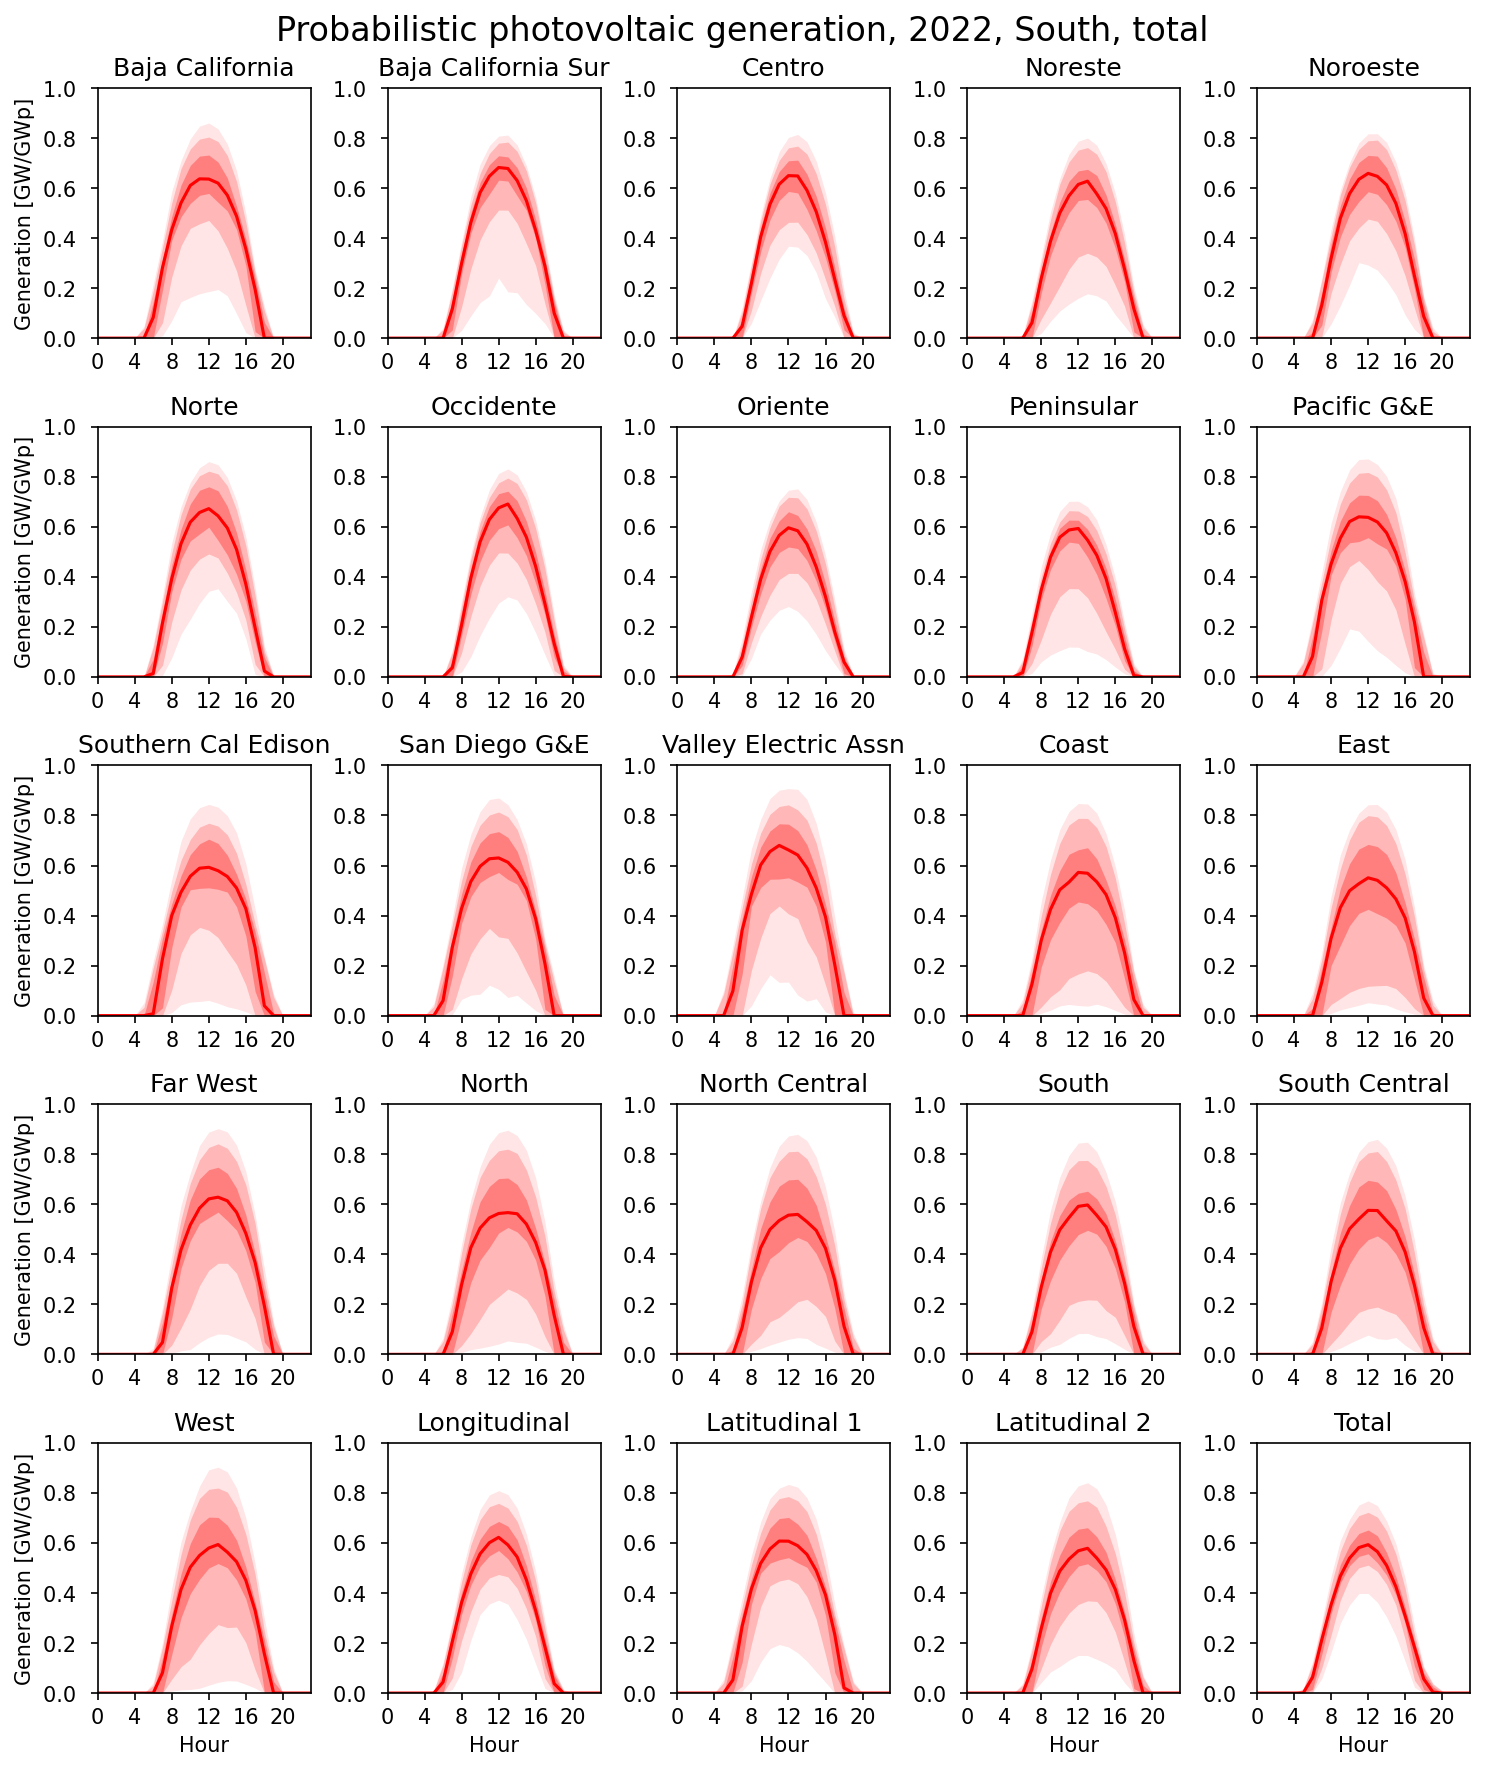

In [31]:
# Gráfica de demanda total

# Incializamos gráfica
fig, axes = plt.subplots(5, 5)
axes = axes.flatten()
fig.set_facecolor("w")
fig.set_size_inches(10, 12)
fig.set_dpi(150) 

ds_c["hour"] = ds_c["time"].dt.hour.copy()
ds_c["dayofyear"] = ds_c["time"].dt.dayofyear.copy()

n = -8
for i, c in enumerate( ds_c["REGION"].values ):
    reg = NAME_REGION_r(c)
    df = ds_c.sel({"REGION": c}).drop_vars("REGION").to_dataframe()
    if c in [22, 23, 24]: df = df[df.index.dayofyear.isin(range(2, 365))]

    # Procesamos datos
    a = df[ ["hour", "dayofyear", prod_n_centr[n]]
        ].reset_index(drop = True).pivot( index = "hour",
        columns = "dayofyear", values = prod_n_centr[n] )
    b = a.quantile( [0, 0.005, 0.05, 0.25,
        0.5, 0.75, 0.95, 0.995, 1], axis = 1 ).T

    # Graficamos
    axes[i].fill_between(b.index, b[1], b[0],
        color = "red", alpha = 0.1, linewidth = 0)
    #axes[i].fill_between(b.index, b[0.995], b[0.005],
    #  color = "red", alpha = 0.1, linewidth = 0)
    axes[i].fill_between(b.index, b[0.95], b[0.05],
        color = "red", alpha = 0.2, linewidth = 0)
    axes[i].fill_between(b.index, b[0.75], b[0.25],
        color = "red", alpha = 0.3, linewidth = 0)
    axes[i].plot(b.index, b[0.5], color = "red")
    #axes[i].plot( a.index,
    #   a[a.min().sort_values().index[0]], color = "darkred" )

    # Formato de gráfica
    #axes[i].legend( ["Minimum-maximum envelope", "5-95% percentile",
    #    "25-75% percentile", "Median", "Day with minimum demand"] )
    axes[i].set_xlim(0, 23)
    axes[i].set_ylim(0, 1)
    axes[i].xaxis.set_major_locator(plt.MultipleLocator(4))
    axes[i].yaxis.set_major_formatter(StrMethodFormatter("{x:<4.1f}"))
    if i%5 == 0: axes[i].set_ylabel("Generation [GW/GWp]")
    if len(axes) - i <= 5: axes[i].set_xlabel("Hour")
    axes[i].set_title(reg)

# Formato de toda la gráfica
fig.suptitle(f"Probabilistic photovoltaic generation, 2022, "
    + f"{names_dn[n%8]}, {prod_n_i[n].split("_")[-1]}", fontsize = 16)
fig.tight_layout()
plt.show()

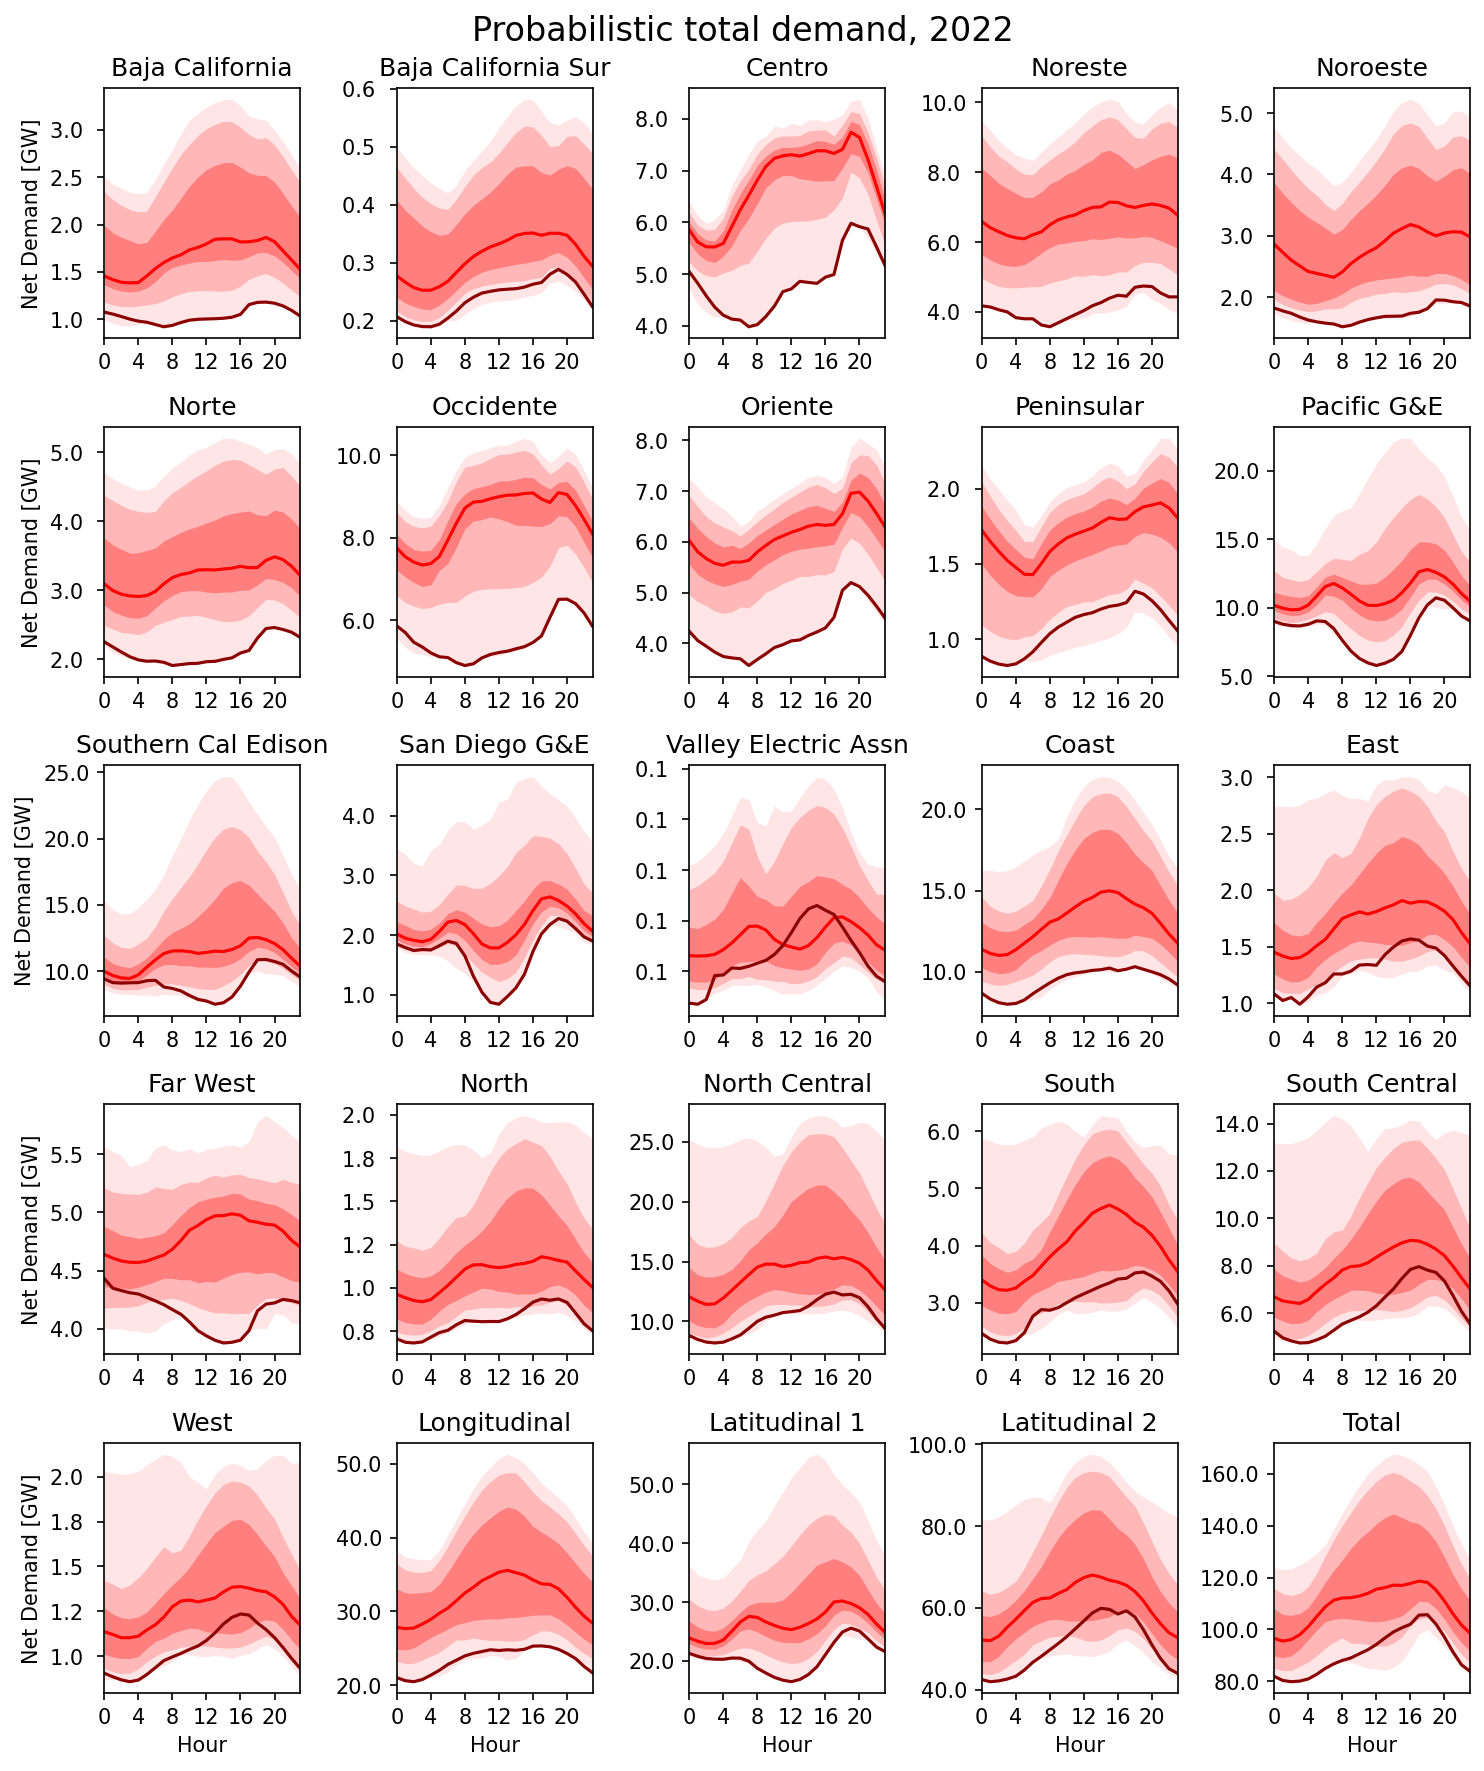

In [32]:
# Gráfica de demanda total

# Incializamos gráfica
fig, axes = plt.subplots(5, 5)
axes = axes.flatten()
fig.set_facecolor("w")
fig.set_size_inches(10, 12)
fig.set_dpi(150) 

for i, c in enumerate( ds_d["REGION"].values ):
    reg = NAME_REGION_r(c)
    df = ds_d.sel({"REGION": c}).drop_vars("REGION").to_dataframe()
    if c in [22, 23, 24, 25]: df = df[df.index.dayofyear.isin(range(2, 365))]

    # Procesamos datos
    a = df[ ["hour", "dayofyear", "Demand"]
        ].reset_index(drop = True).pivot( index = "hour",
        columns = "dayofyear", values = "Demand" ) / 1000
    b = a.quantile( [0, 0.005, 0.05, 0.25,
        0.5, 0.75, 0.95, 0.995, 1], axis = 1 ).T

    # Graficamos
    axes[i].fill_between(b.index, b[1], b[0],
        color = "red", alpha = 0.1, linewidth = 0)
    #axes[i].fill_between(b.index, b[0.995], b[0.005],
    #  color = "red", alpha = 0.1, linewidth = 0)
    axes[i].fill_between(b.index, b[0.95], b[0.05],
        color = "red", alpha = 0.2, linewidth = 0)
    axes[i].fill_between(b.index, b[0.75], b[0.25],
        color = "red", alpha = 0.3, linewidth = 0)
    axes[i].plot(b.index, b[0.5], color = "red")
    axes[i].plot( a.index,
       a[a.min().sort_values().index[0]], color = "darkred" )

    # Formato de gráfica
    #axes[i].legend( ["Minimum-maximum envelope", "5-95% percentile",
    #    "25-75% percentile", "Median", "Day with minimum demand"] )
    axes[i].set_xlim(0, 23)
    #axes[i].set_ylim(0, 20000)
    axes[i].xaxis.set_major_locator(plt.MultipleLocator(4))
    axes[i].yaxis.set_major_formatter(StrMethodFormatter("{x:<4.1f}"))
    if i%5 == 0: axes[i].set_ylabel("Net Demand [GW]")
    if len(axes) - i <= 5: axes[i].set_xlabel("Hour")
    axes[i].set_title(reg)

# Formato de toda la gráfica
fig.suptitle(f"Probabilistic total demand, 2022",
    fontsize = 16)
fig.tight_layout()
plt.show()

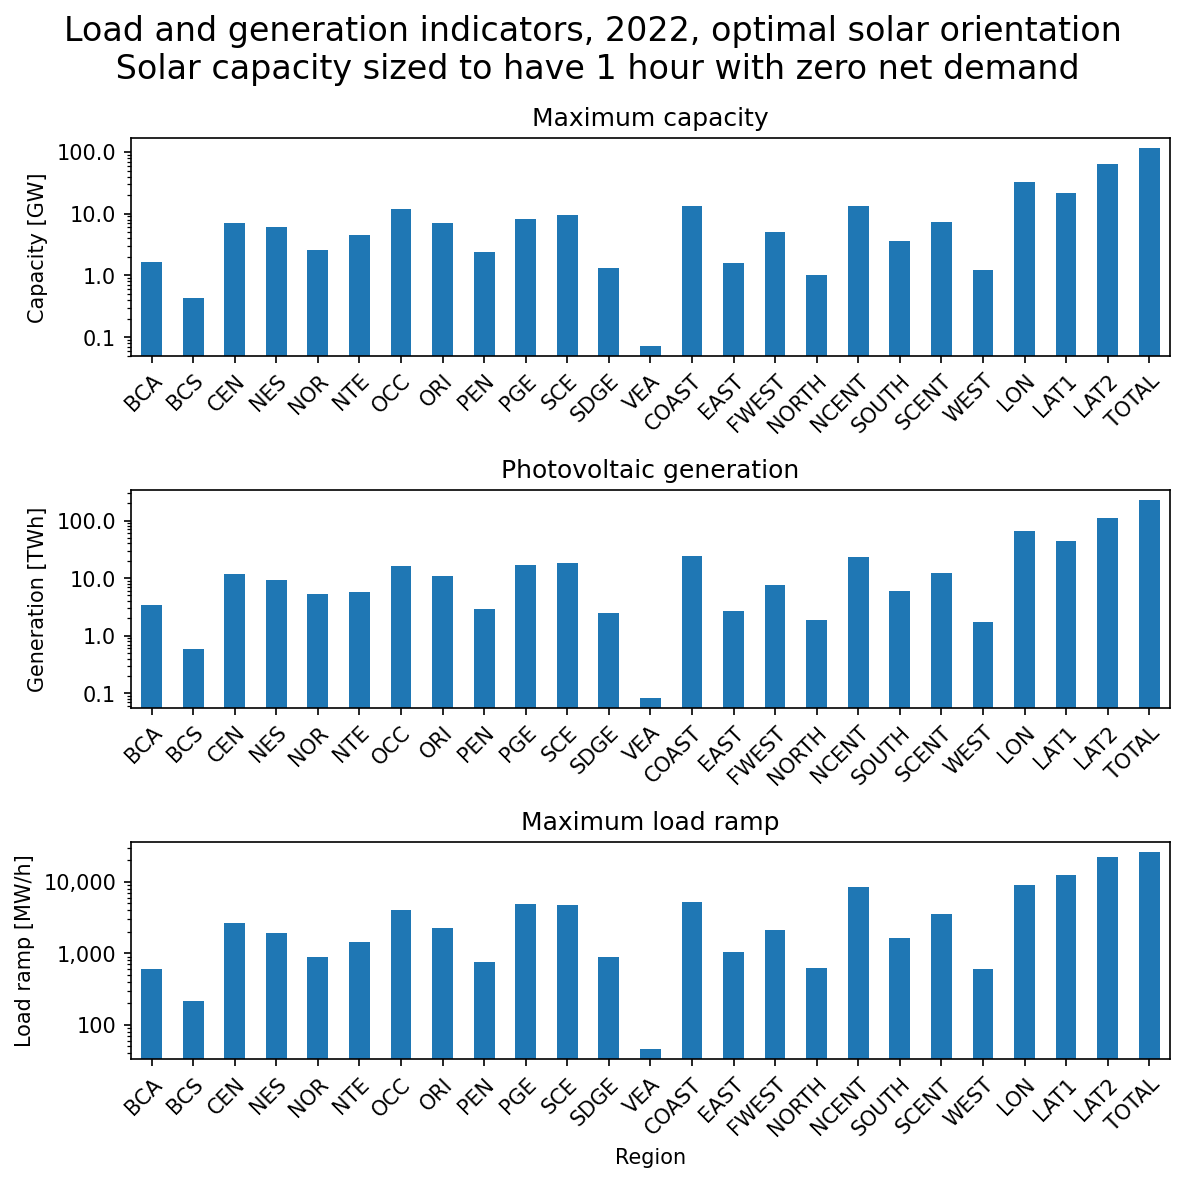

In [33]:
# Comparamos cada variable para las distintas regiones

# Escogemos la configuración ideal para cada región
conf_i = max_score.apply(lambda x: names_dn.index(x))

# Incializamos gráfica
fig, axes = plt.subplots(3)
axes = axes.flatten()
fig.set_facecolor("w")
fig.set_size_inches(8, 8)
fig.set_dpi(150) 

# Maximum capacity
df_r_2 = pd.DataFrame(index = df_r.index, columns = ["Data"])
for c in df_r_2.index.values:
    df_r_2.loc[c] = df_r.loc[c, prod_n_cap[24 + conf_i[NUM_REGION(c)]]]
df_r_2.plot.bar( ax = axes[0], legend = False )
axes[0].set_title("Maximum capacity")
axes[0].set_xlabel("")
axes[0].set_ylabel("Capacity [GW]")
axes[0].set_yscale("log")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 45,
    ha = "right", rotation_mode = "anchor")
axes[0].yaxis.set_major_formatter(StrMethodFormatter("{x:,.1f}"))

# Photovoltaic generation
df_r_2 = pd.DataFrame(index = df_r.index, columns = ["Data"])
for c in df_r_2.index.values:
    df_r_2.loc[c] = df_r.loc[c, ener[24 + conf_i[NUM_REGION(c)]]]
df_r_2.plot.bar( ax = axes[1], legend = False )
axes[1].set_title("Photovoltaic generation")
axes[1].set_xlabel("")
axes[1].set_ylabel("Generation [TWh]")
axes[1].set_yscale("log")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 45,
    ha = "right", rotation_mode = "anchor")
axes[1].yaxis.set_major_formatter(StrMethodFormatter("{x:,.1f}"))

# Maximum load ramp
df_r_2 = pd.DataFrame(index = df_r.index, columns = ["Data"])
for c in df_r_2.index.values: df_r_2.loc[c] = df_r.loc[
    c, track_net_demand_dt_max[24 + conf_i[NUM_REGION(c)]]]
df_r_2.plot.bar( ax = axes[2], legend = False )
axes[2].set_title("Maximum load ramp")
axes[2].set_xlabel("Region")
axes[2].set_ylabel("Load ramp [MW/h]")
axes[2].set_yscale("log")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation = 45,
    ha = "right", rotation_mode = "anchor")
axes[2].yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))

# Formato de toda la gráfica
fig.suptitle("Load and generation indicators, 2022, optimal solar orientation"
    + "\n Solar capacity sized to have 1 hour with zero net demand",
    fontsize = 16)
fig.tight_layout()
plt.show()

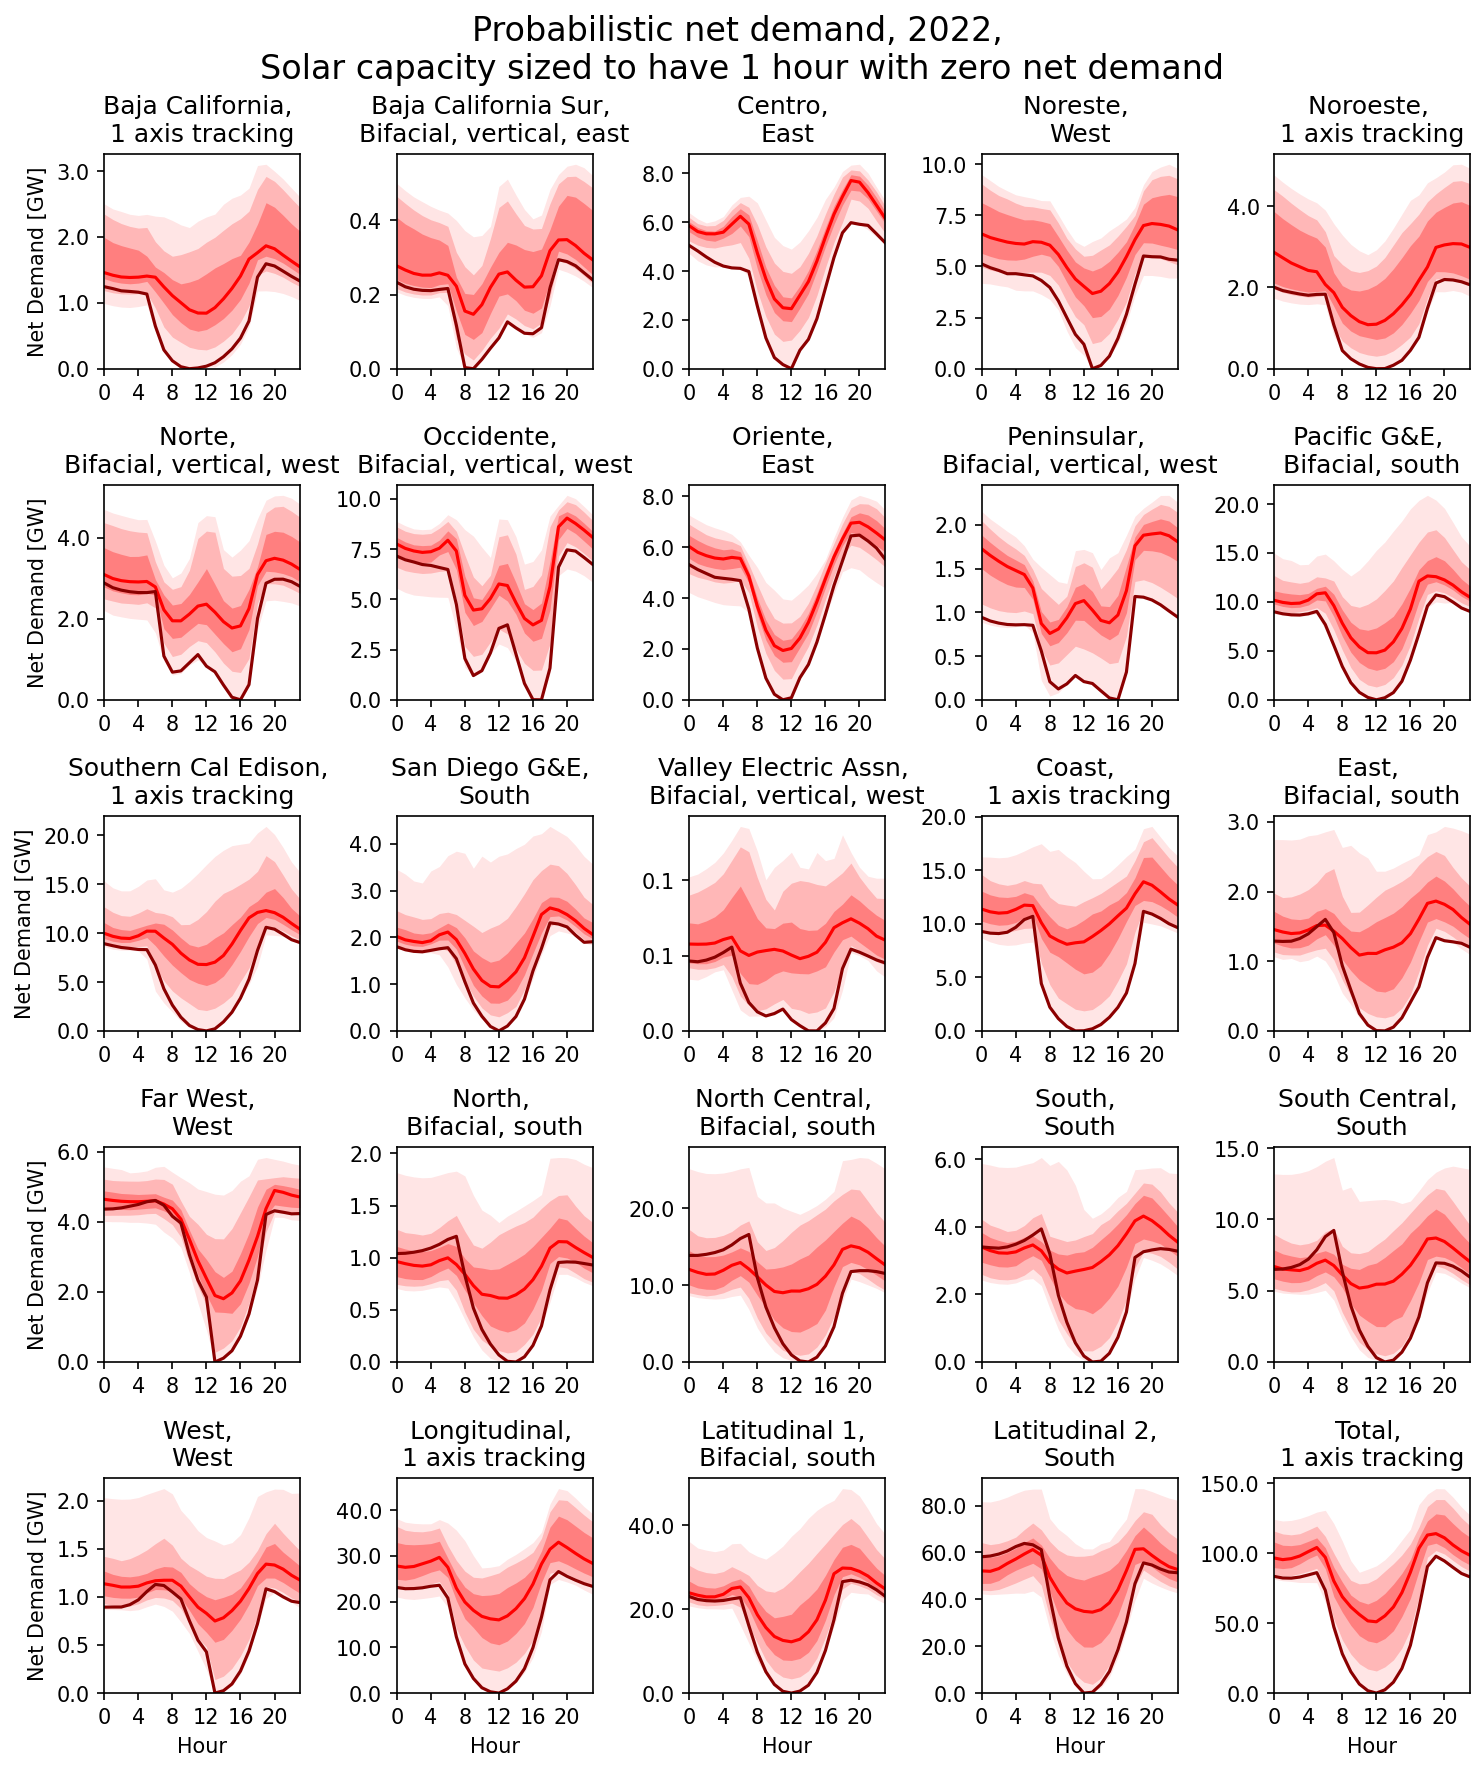

In [34]:
# Gráfica de demanda neta

# Incializamos gráfica
fig, axes = plt.subplots(5, 5)
axes = fig.axes
fig.set_facecolor("w")
fig.set_size_inches(10, 12)
fig.set_dpi(150) 

n = 24
# Iteramos para cada gráfica
for i, ax in enumerate(axes):
    # Procesamos datos
    c = ds_c["REGION"].values[i]
    a = ds_c.sel({"REGION": c}).drop_vars("REGION")[ [ "hour", "dayofyear",
        track_net_demand[n + conf_i[c]] ] ].to_dataframe()
    a[track_net_demand[n + conf_i[c]]] /= 1000
    a = a.reset_index(drop = True).pivot( index = "hour",
        columns = "dayofyear", values = track_net_demand[n + conf_i[c]] )
    b = a.quantile( [0, 0.005, 0.05, 0.25,
        0.5, 0.75, 0.95, 0.995, 1], axis = 1) .T

    # Graficamos
    ax.fill_between(b.index, b[1], b[0],
        color = "red", alpha = 0.1, linewidth = 0)
    #ax.fill_between(b.index, b[0.995], b[0.005],
    #    color = "red", alpha = 0.1, linewidth = 0)
    ax.fill_between(b.index, b[0.95], b[0.05],
        color = "red", alpha = 0.2, linewidth = 0)
    ax.fill_between(b.index, b[0.75], b[0.25],
        color = "red", alpha = 0.3, linewidth = 0)
    ax.plot(b.index, b[0.5], color = "red")
    ax.plot(a.index, a[ a.min().sort_values().index[0] ], color = "darkred")

    ax.set_title(f"{NAME_REGION_r(c)}, \n{names_dn[conf_i[c]]}")
    ax.set_xlim(0, 23)
    ax.set_ylim(0)
    #ax.set_ylim(0, 10000)
    ax.xaxis.set_major_locator(plt.MultipleLocator(4))
    ax.yaxis.set_major_formatter(StrMethodFormatter("{x:,.1f}"))
    if i%5 == 0: ax.set_ylabel("Net Demand [GW]")
    if len(axes) - i <= 5: ax.set_xlabel("Hour")

# Formato de toda la gráfica
fig.suptitle(f"Probabilistic net demand, 2022, \n"
    + "Solar capacity sized to have 1 hour with zero net demand",
    fontsize = 16)
fig.tight_layout()
plt.show()

# Resumen por región

In [35]:
# Escogemos los datos de una región
c = 25
reg = NAME_REGION_r(c)
df = ds_c.sel({"REGION": c}).drop_vars("REGION").to_dataframe()

# Resultados de producción fotovoltaica, 
# diferencia entre datos sin y con ponderación
pd.options.display.float_format = "{:,.2f} %".format
a = ds_c[prod_n_cap[0:8]].to_dataframe()
b = ds_c[prod_n_cap[24:32]].to_dataframe()
diff_weight = (1 - a / b.values)*100
diff_weight.columns = names_dn
print(f"Mean weighting error: {diff_weight.mean().mean():.3f}%")
diff_weight

Mean weighting error: 0.380%


South    West    East  1 axis tracking  2 axis tracking  \
REGION                                                             
1      -5.82 %  4.06 %  2.11 %           2.28 %          -4.94 %   
2       1.21 %  0.82 %  0.92 %           0.92 %           0.77 %   
3      -1.76 % -0.65 % -0.83 %          -0.88 %          -1.90 %   
4       2.97 % -0.46 % -0.30 %          -0.29 %           2.81 %   
5      -1.52 %  0.46 %  0.56 %           0.54 %          -0.44 %   
6       2.91 % -0.56 % -0.37 %          -0.40 %           2.57 %   
7      -0.54 % -0.43 %  0.73 %          -0.24 %          -0.58 %   
8      -0.01 % -0.57 % -1.56 %          -2.04 %           0.06 %   
9       2.75 %  2.73 % -2.83 %          -1.15 %          -0.82 %   
10      0.83 %  0.87 %  1.10 %           0.83 %           0.90 %   
11      1.58 % -0.15 %  0.04 %          -0.07 %           1.37 %   
12      0.36 %  0.32 %  0.32 %           0.39 %           0.43 %   
13     -0.64 %  1.68 %  2.16 %           2.15 %           2.19 %   
14     -0.26 % -0.04 % -0.06 %          -0.06 %          -0.30 %   
15     -0.25 % -0.20 % -0.25 %          -0.21 %          -0.27 %   
16      0.10 %  0.77 %  0.65 %           0.63 %          -0.00 %   
17      0.25 % -0.02 % -0.07 %          -0.01 %          -0.11 %   
18      0.44 %  0.05 % -0.05 %          -0.01 %           0.05 %   
19     -0.22 %  0.23 %  0.13 %           0.14 %           0.07 %   
20     -0.24 %  0.02 %  0.02 %           0.01 %          -0.04 %   
21      0.07 %  0.30 %  0.14 %           0.12 %           0.09 %   
22      0.35 %  6.25 %  2.73 %           3.99 %           0.16 %   
23      2.08 % -0.27 %  0.56 %          -0.09 %          -0.10 %   
24      0.46 %  1.26 % -0.08 %           0.60 %           0.54 %   
25      0.68 %  2.11 %  1.68 %           1.32 %           0.59 %   

        Bifacial, vertical, west  Bifacial, vertical, east  Bifacial, south  
REGION                                                                       
1                         1.22 %                    5.10 %          -5.93 %  
2                        -0.81 %                    1.32 %           1.08 %  
3                         0.69 %                   -2.03 %          -1.76 %  
4                         2.39 %                    1.37 %           2.65 %  
5                         2.01 %                    0.68 %          -1.45 %  
6                        -0.50 %                    0.03 %           2.63 %  
7                         2.50 %                   -0.35 %          -0.60 %  
8                        -1.52 %                   -2.54 %          -0.06 %  
9                         0.40 %                   -2.98 %           2.32 %  
10                        1.19 %                    2.24 %           0.69 %  
11                        0.31 %                    0.89 %           1.43 %  
12                       -0.27 %                    1.09 %           0.28 %  
13                        1.56 %                    2.51 %          -0.33 %  
14                       -0.11 %                    0.01 %          -0.20 %  
15                       -0.02 %                   -0.07 %          -0.23 %  
16                        0.74 %                   -0.03 %           0.07 %  
17                       -0.11 %                    0.05 %           0.24 %  
18                        0.34 %                    0.40 %           0.40 %  
19                       -0.21 %                   -0.04 %          -0.29 %  
20                       -0.08 %                   -0.18 %          -0.22 %  
21                        0.39 %                    0.84 %           0.11 %  
22                        2.71 %                    2.87 %           0.19 %  
23                        0.27 %                    0.51 %           1.94 %  
24                        0.10 %                   -0.61 %           0.52 %  
25                        0.20 %                    4.04 %           0.63 %

/var/folders/td/smccb02154l21rhgckcmbs940000gn/T/ipykernel_8047/3646957009.py:35: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax.legend( ["_", "5-95% percentile"],
/var/folders/td/smccb02154l21rhgckcmbs940000gn/T/ipykernel_8047/3646957009.py:38: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax.legend( ["_", "_", "25-75% percentile"],
/var/folders/td/smccb02154l21rhgckcmbs940000gn/T/ipykernel_8047/3646957009.py:41: MatplotlibDeprecationWarning: An artist whose label starts with an underscor

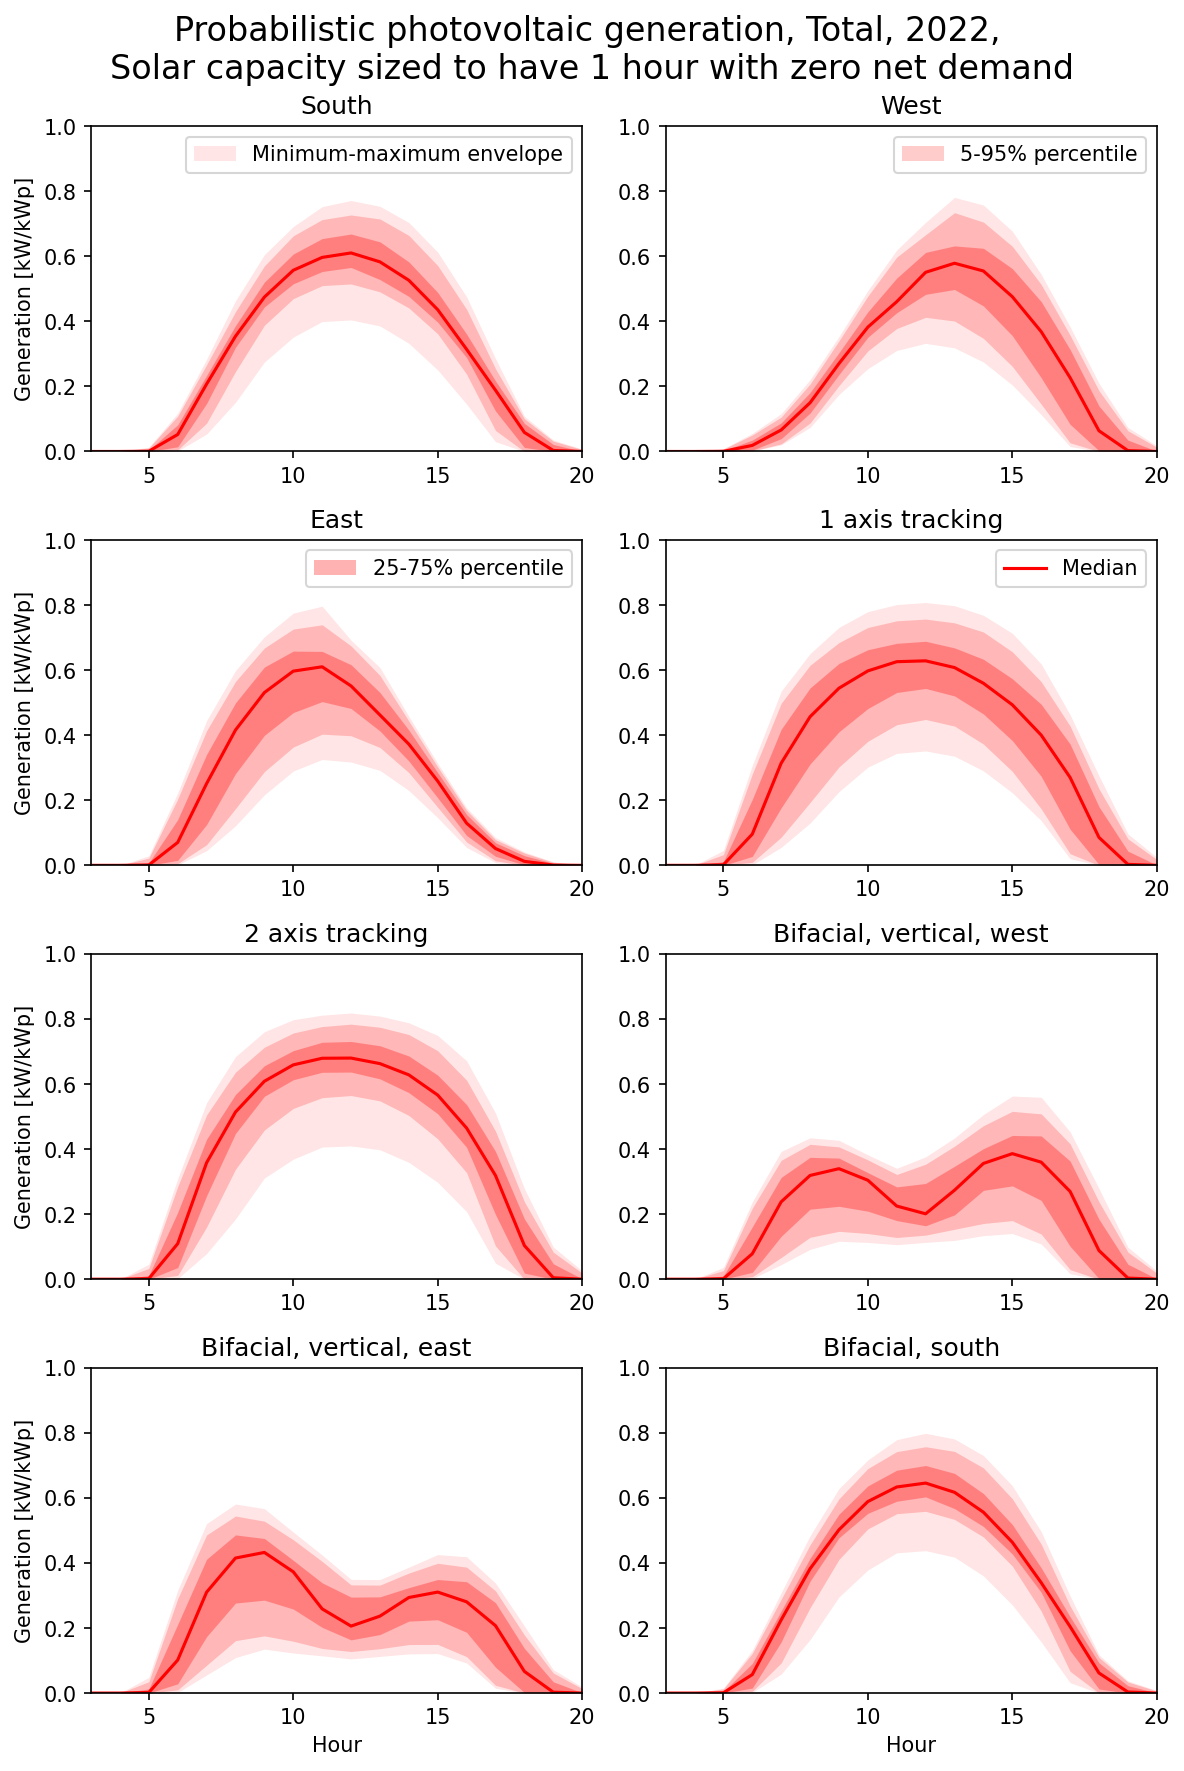

In [36]:
# Gráfica de producción fotovoltaica

# Incializamos gráfica
fig, axes = plt.subplots(4, 2)
axes = fig.axes
fig.set_facecolor("w")
fig.set_size_inches(8, 12)
fig.set_dpi(150) 

# Iteramos para cada gráfica
for i, ax in enumerate(axes):
    # Procesamos los datos
    a = df[ ["hour", "dayofyear", prod_n[i]]
        ].reset_index(drop = True).pivot( index = "hour",
        columns = "dayofyear", values = prod_n[i] )
    b = a.quantile( [0, 0.005, 0.05, 0.25,
        0.5, 0.75, 0.95, 0.995, 1], axis = 1 ).T

    # Graficamos
    ax.fill_between(b.index, b[1], b[0],
        color = "red", alpha = 0.1, linewidth = 0)
    #ax.fill_between(b.index, b[0.995], b[0.005],
    #    color = "red", alpha = 0.1, linewidth = 0)
    ax.fill_between(b.index, b[0.95], b[0.05],
        color = "red", alpha = 0.2, linewidth = 0)
    ax.fill_between(b.index, b[0.75], b[0.25],
        color = "red", alpha = 0.3, linewidth = 0)
    ax.plot(b.index, b[0.5], color = "red")

    # Formato de gráfica
    if   i == 0:
        ax.legend( ["Minimum-maximum envelope"],
            prop = { "size": 10 }, ncol = 2 )
    elif i == 1:
        ax.legend( ["_", "5-95% percentile"],
            prop = { "size": 10 }, ncol = 2 )
    elif i == 2:
        ax.legend( ["_", "_", "25-75% percentile"],
            prop = { "size": 10 }, ncol = 2 )
    elif i == 3:
        ax.legend( ["_", "_", "_", "Median"],
            prop = { "size": 10 }, ncol = 2 )
    ax.set_title(names_dn[i])
    ax.set_xlim(3, 20)
    ax.set_ylim(0, 1)
    ax.xaxis.set_major_locator(plt.MultipleLocator(5))
    ax.yaxis.set_major_formatter(StrMethodFormatter("{x:,.1f}"))
    if i%2 == 0: ax.set_ylabel("Generation [kW/kWp]")
    if len(axes) - i <= 2: ax.set_xlabel("Hour")

# Formato de toda la gráfica
fig.suptitle(f"Probabilistic photovoltaic generation, {reg}, 2022, \n"
    + "Solar capacity sized to have 1 hour with zero net demand",
    fontsize = 16)
fig.tight_layout()
plt.show()

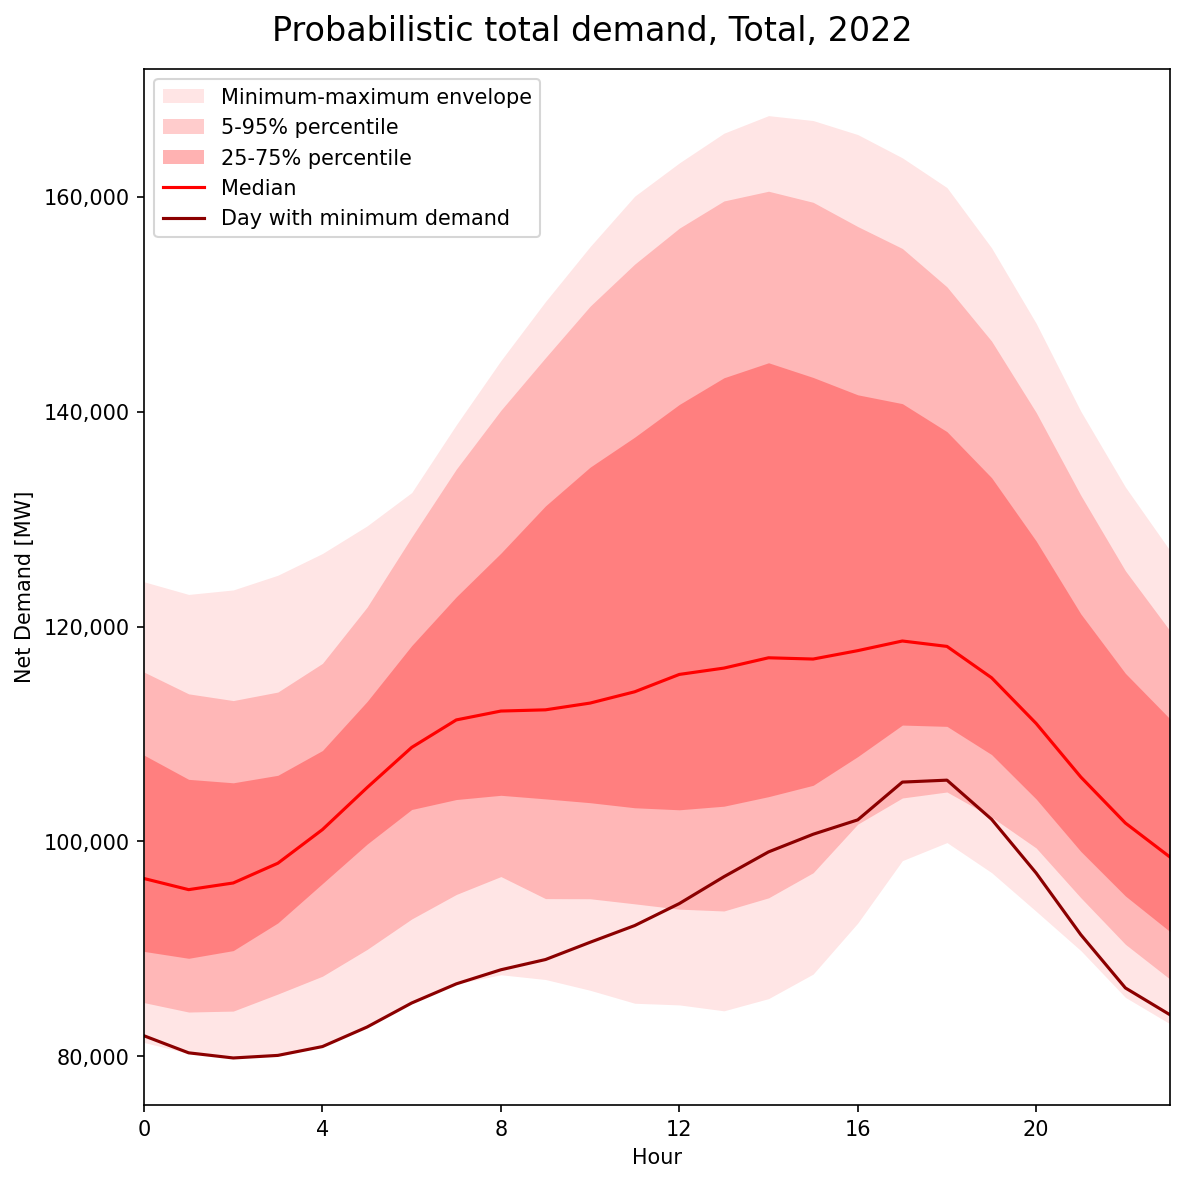

In [37]:
# Gráfica de demanda total

# Incializamos gráfica
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(8, 8)
fig.set_dpi(150) 

# Procesamos datos
a = df[ ["hour", "dayofyear", "Demand"]
    ].reset_index(drop = True).pivot( index = "hour",
    columns = "dayofyear", values = "Demand" )
if c in [22, 23, 24, 25]: a = a.drop(columns = [1, 365])
b = a.quantile([0, 0.005, 0.05, 0.25, 0.5, 0.75, 0.95, 0.995, 1], axis = 1).T

# Graficamos
ax.fill_between(b.index, b[1], b[0],
    color = "red", alpha = 0.1, linewidth = 0)
#ax.fill_between(b.index, b[0.995], b[0.005],
#    color = "red", alpha = 0.1, linewidth = 0)
ax.fill_between(b.index, b[0.95], b[0.05],
    color = "red", alpha = 0.2, linewidth = 0)
ax.fill_between(b.index, b[0.75], b[0.25],
    color = "red", alpha = 0.3, linewidth = 0)
ax.plot(b.index, b[0.5], color = "red")
ax.plot(a.index, a[ a.min().sort_values().index[0] ], color = "darkred")

# Formato de gráfica
ax.legend( ["Minimum-maximum envelope", "5-95% percentile",
    "25-75% percentile", "Median",
    "Day with minimum demand"], loc = "upper left" )
ax.set_xlim(0, 23)
#ax.set_ylim(3500, 8500)
ax.xaxis.set_major_locator(plt.MultipleLocator(4))
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))
ax.set_ylabel("Net Demand [MW]")
ax.set_xlabel("Hour")
fig.suptitle(f"Probabilistic total demand, {reg}, 2022",
    fontsize = 16)
fig.tight_layout()
plt.show()

In [38]:
# Resultados para cada configuración
results = [ prod_n_sum_i[-8:], prod_n_cap[-8:], ener[-8:], cap_f[-8:],
     track_net_demand_max[-8:], track_net_demand_dt_max[-8:] ]
indicators = [ "Photovoltaic production per kWp", "Maximum capacity",
    "Photovoltaic production", "Capacity factor",
    "Maximum load", "Maximum load ramp" ]
format = [ "{:,.0f} kWh/kWp".format, "{:.1f} GW".format,
           "{:,.0f} TWh".format, "{:.1f} %".format,
           "{:,.0f} MW".format, "{:,.0f} MW".format]

for i in range(len(results)):
    print(indicators[i])
    pd.options.display.float_format = format[i]
    a = df[results[i]].iloc[i]
    a.index = names_dn
    print( a.sort_values(ascending = False).to_string() )
    print()

Photovoltaic production per kWp
2 axis tracking            2,250 kWh/kWp
1 axis tracking            1,978 kWh/kWp
Bifacial, south            1,897 kWh/kWp
South                      1,782 kWh/kWp
East                       1,501 kWh/kWp
West                       1,485 kWh/kWp
Bifacial, vertical, east   1,203 kWh/kWp
Bifacial, vertical, west   1,194 kWh/kWp

Maximum capacity
Bifacial, vertical, west   181.0 GW
Bifacial, vertical, east   177.0 GW
West                       120.5 GW
East                       118.6 GW
1 axis tracking            115.6 GW
South                      115.0 GW
Bifacial, south            110.9 GW
2 axis tracking            109.9 GW

Photovoltaic production
2 axis tracking            247 TWh
1 axis tracking            229 TWh
Bifacial, vertical, west   216 TWh
Bifacial, vertical, east   213 TWh
Bifacial, south            210 TWh
South                      205 TWh
West                       179 TWh
East                       178 TWh

Capacity factor
2 axis track

/var/folders/td/smccb02154l21rhgckcmbs940000gn/T/ipykernel_8047/1038404321.py:36: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax.legend( ["_", "5-95% percentile"],
/var/folders/td/smccb02154l21rhgckcmbs940000gn/T/ipykernel_8047/1038404321.py:39: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax.legend( ["_", "_", "25-75% percentile"],
/var/folders/td/smccb02154l21rhgckcmbs940000gn/T/ipykernel_8047/1038404321.py:42: MatplotlibDeprecationWarning: An artist whose label starts with an underscor

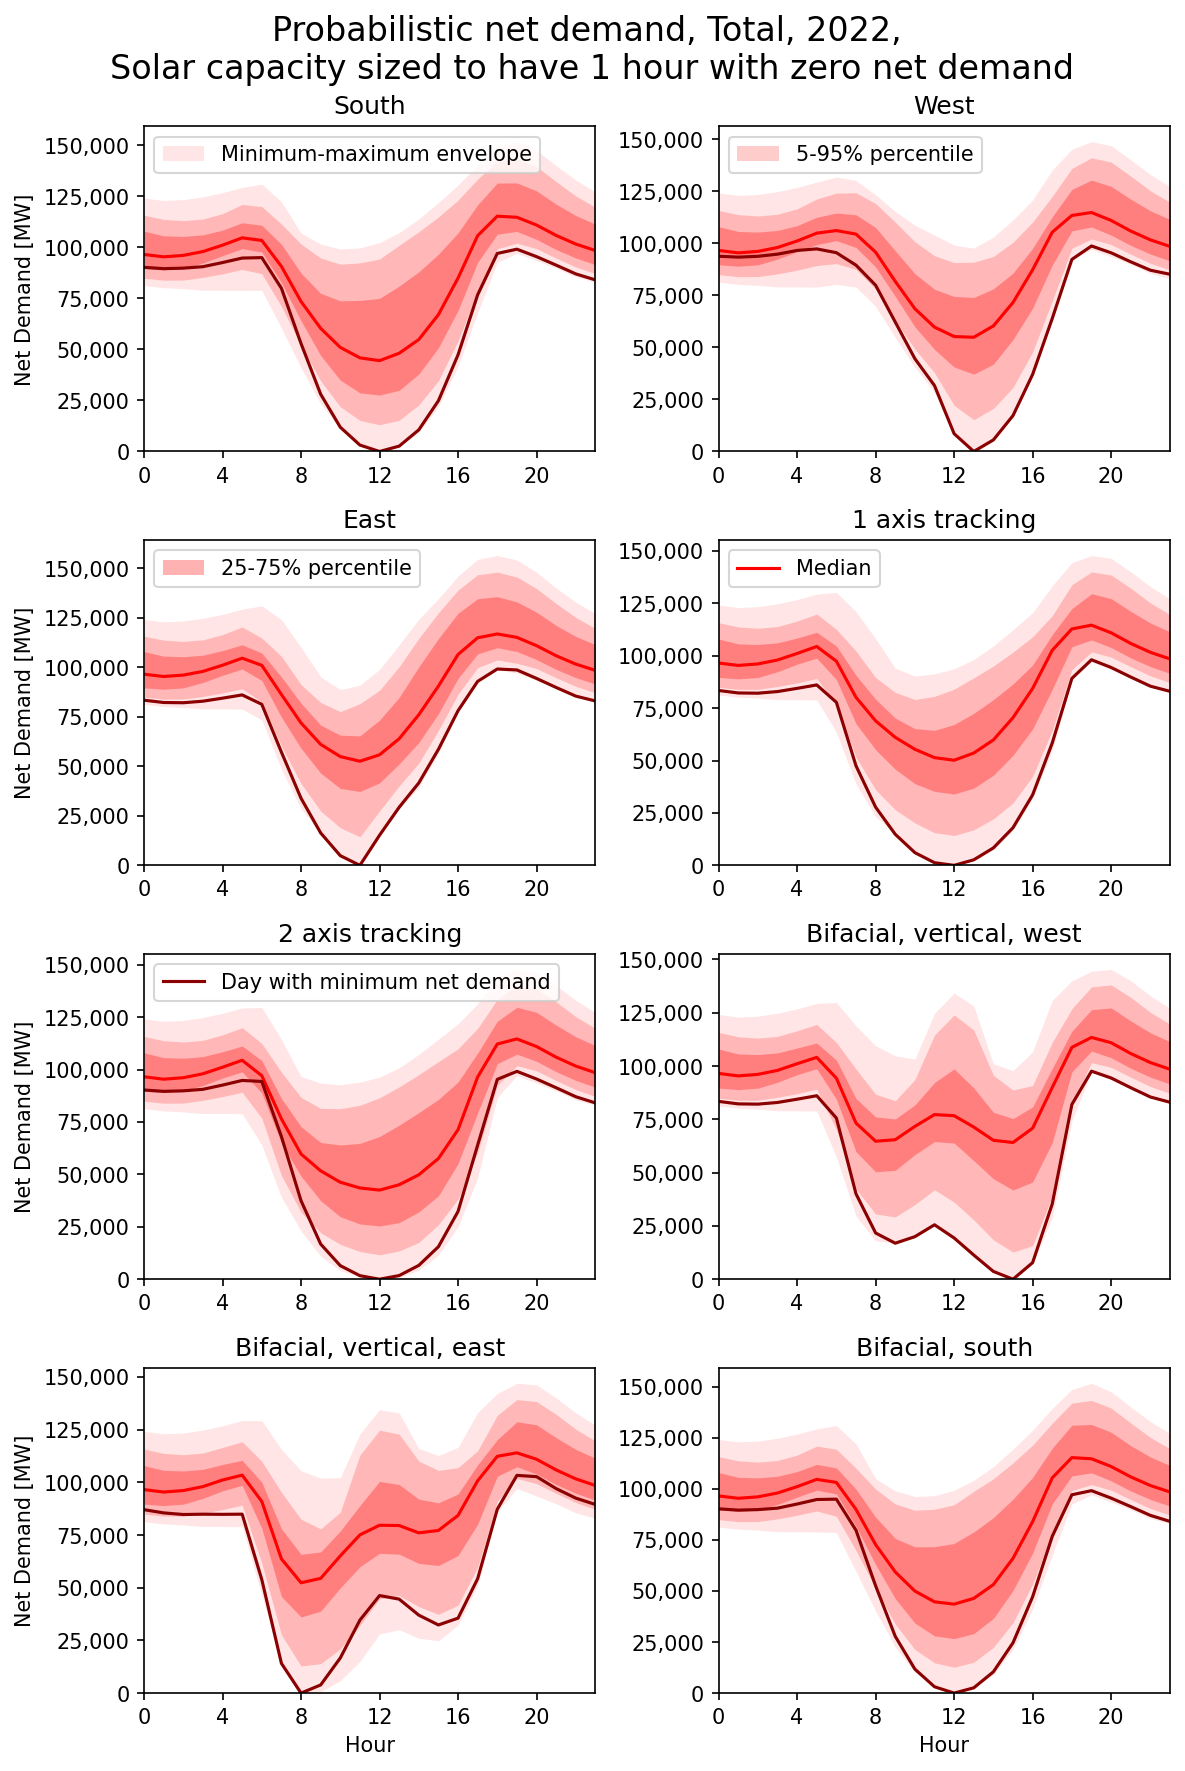

In [39]:
# Gráfica de demanda neta

# Incializamos gráfica
fig, axes = plt.subplots(4, 2)
axes = fig.axes
fig.set_facecolor("w")
fig.set_size_inches(8, 12)
fig.set_dpi(150) 

# Iteramos para cada gráfica
for i, ax in enumerate(axes):
    # Procesamos datos
    a = df[ ["hour", "dayofyear", track_net_demand[i]]
        ].reset_index(drop = True).pivot( index = "hour",
        columns = "dayofyear", values = track_net_demand[i] )
    b = a.quantile( [0, 0.005, 0.05, 0.25,
        0.5, 0.75, 0.95, 0.995, 1], axis = 1) .T

    # Graficamos
    ax.fill_between(b.index, b[1], b[0],
        color = "red", alpha = 0.1, linewidth = 0)
    #ax.fill_between(b.index, b[0.995], b[0.005],
    #    color = "red", alpha = 0.1, linewidth = 0)
    ax.fill_between(b.index, b[0.95], b[0.05],
        color = "red", alpha = 0.2, linewidth = 0)
    ax.fill_between(b.index, b[0.75], b[0.25],
        color = "red", alpha = 0.3, linewidth = 0)
    ax.plot(b.index, b[0.5], color = "red")
    ax.plot(a.index, a[ a.min().sort_values().index[0] ], color = "darkred")

    # Formato de gráfica
    if   i == 0:
        ax.legend( ["Minimum-maximum envelope"],
            loc = "upper left", prop = { "size": 10 }, ncol = 2 )
    elif i == 1:
        ax.legend( ["_", "5-95% percentile"],
            loc = "upper left", prop = { "size": 10 }, ncol = 2 )
    elif i == 2:
        ax.legend( ["_", "_", "25-75% percentile"],
            loc = "upper left", prop = { "size": 10 }, ncol = 2 )
    elif i == 3:
        ax.legend( ["_", "_", "_", "Median"],
            loc = "upper left", prop = { "size": 10 }, ncol = 2 )
    elif i == 4:
        ax.legend( ["_", "_", "_", "_", "Day with minimum net demand"],
            loc = "upper left", prop = { "size": 10 }, ncol = 2 )
    ax.set_title(names_dn[i])
    ax.set_xlim(0, 23)
    ax.set_ylim(0)
    #ax.set_ylim(0, 10000)
    ax.xaxis.set_major_locator(plt.MultipleLocator(4))
    ax.yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))
    if i%2 == 0: ax.set_ylabel("Net Demand [MW]")
    if len(axes) - i <= 2: ax.set_xlabel("Hour")

# Formato de toda la gráfica
fig.suptitle(f"Probabilistic net demand, {reg}, 2022, \n"
    + "Solar capacity sized to have 1 hour with zero net demand",
    fontsize = 16)
fig.tight_layout()
plt.show()

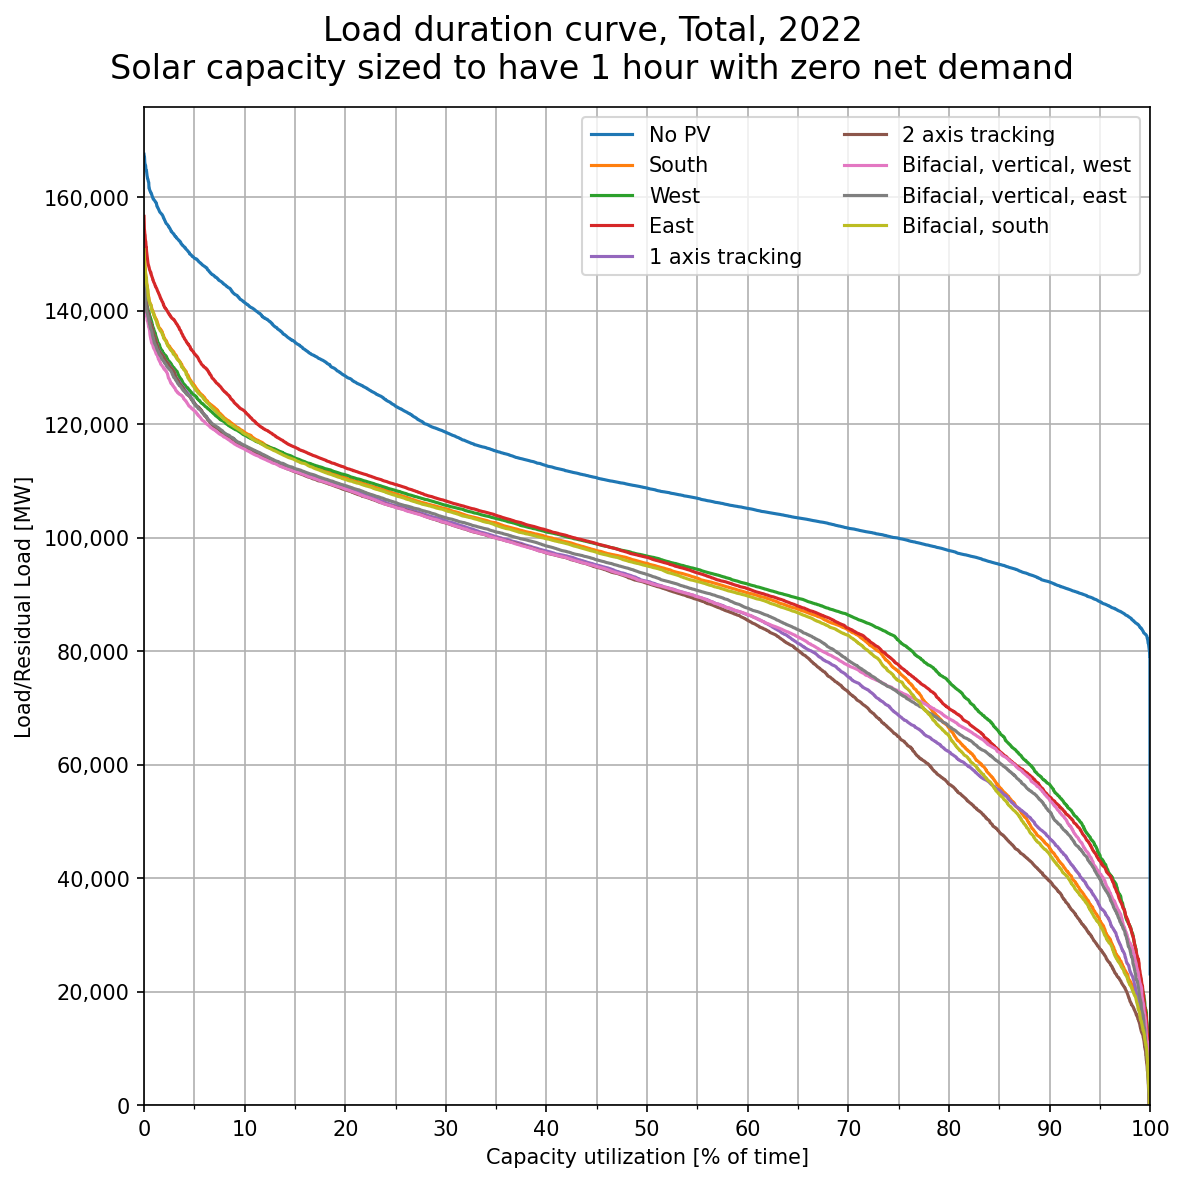

In [40]:
# Load duration curve

# Incializamos gráfica
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(8, 8)
fig.set_dpi(150) 

# Iteramos para cada caso
for v in ["Demand"] + track_net_demand[24:]:
    a = df[ [v] ].sort_values( v, ascending = False ).reset_index(drop = True)
    a.index /= 2
    a.index = a.index / a.index.max() * 100
    ax.plot(a.index, a[v])

# Formato de gráfica
ax.legend( ["No PV"] + names_dn, ncol = 2 )
ax.set_xlim(0, 100)
#ax.set_ylim(0, 8500)
ax.set_ylim(0)
ax.grid("both", "both")
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
#ax.yaxis.set_major_locator(plt.MultipleLocator(1000))
#ax.yaxis.set_minor_locator(plt.MultipleLocator(500))
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))
ax.set_ylabel("Load/Residual Load [MW]")
ax.set_xlabel("Capacity utilization [% of time]")
fig.suptitle(f"Load duration curve, {reg}, 2022\n"
    + "Solar capacity sized to have 1 hour with zero net demand",
    fontsize = 16)
fig.tight_layout()
plt.show()

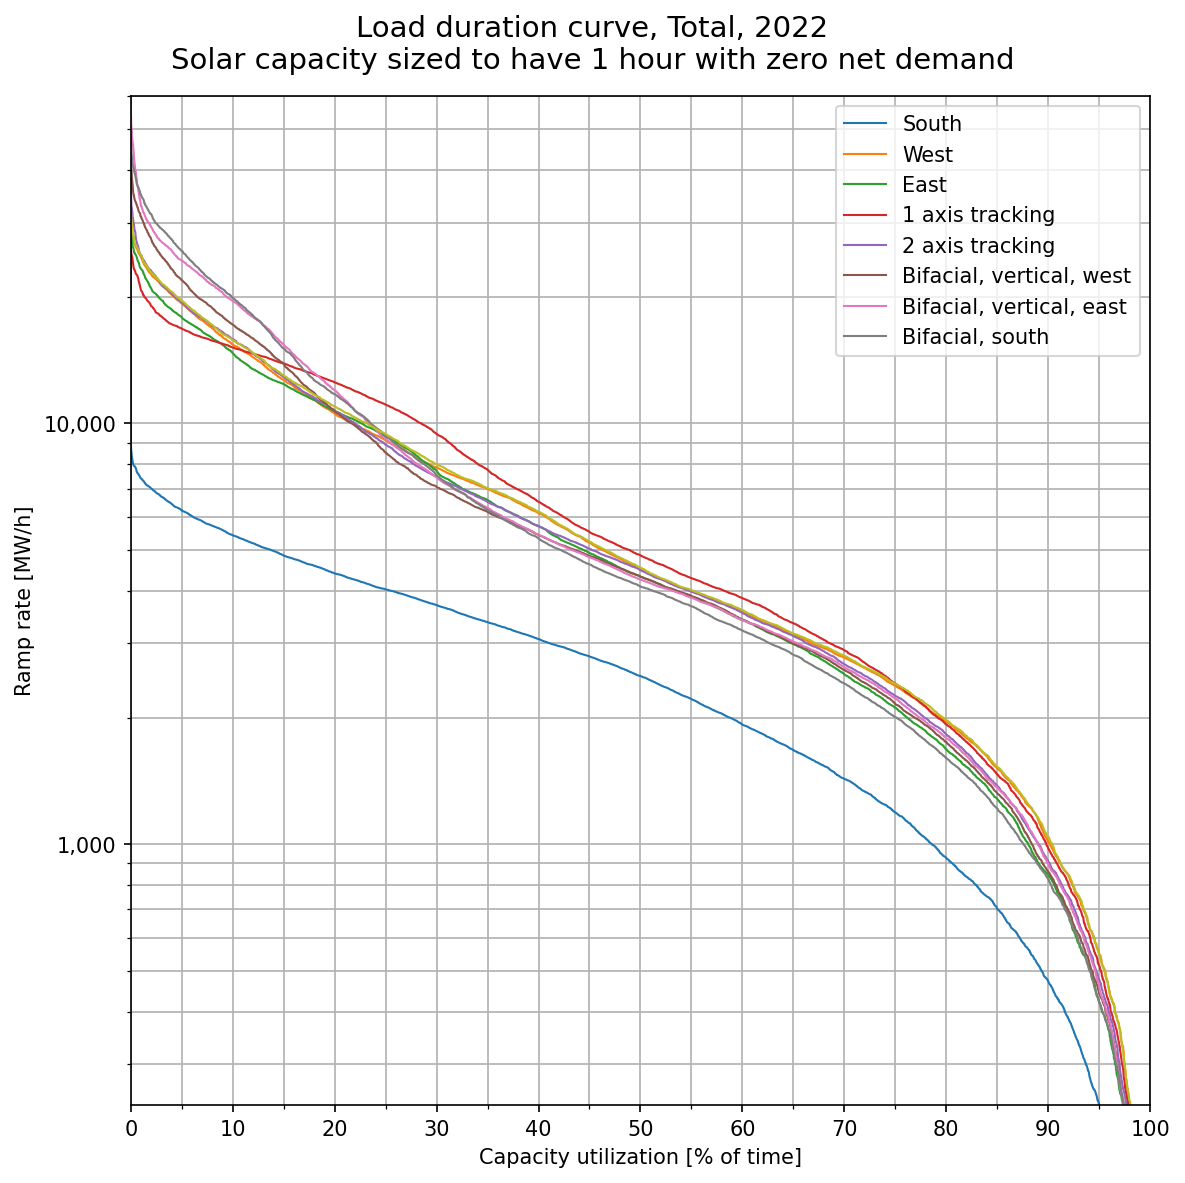

In [41]:
# Ramp duration curve

# Incializamos gráfica
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(8, 8)
fig.set_dpi(150) 

# Iteramos para cada caso
max_dt = []
for v in ["Demand_dt"] + track_net_demand_dt[24:]:
    a = np.abs(df[[v]]).sort_values( v,
        ascending = False ).reset_index(drop = True)
    a = a.where(a>0, 0)
    a.index = a.index / a.index.max() * 100
    if v == "Demand_dt": min_dt = np.floor(a.iloc[8322]).values[0]
    max_dt.append(a.iloc[0].values[0])
    ax.plot(a.index, a[v], linewidth = 1)
max_exp = np.ceil(np.log10(max(max_dt)))

# Formato de gráfica
ax.legend( names_dn, ncol = 1 )
ax.set_yscale("log")
ax.set_xlim(0, 100)
ax.set_ylim(min_dt, np.ceil(max(max_dt) / 10**(max_exp-1)) * 10**(max_exp-1))
ax.grid("both", "both")
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))
ax.set_ylabel("Ramp rate [MW/h]")
ax.set_xlabel("Capacity utilization [% of time]")

fig.suptitle(f"Load duration curve, {reg}, 2022\n"
    + "Solar capacity sized to have 1 hour with zero net demand",
    fontsize = 14)
fig.tight_layout()
plt.show()

/var/folders/td/smccb02154l21rhgckcmbs940000gn/T/ipykernel_8047/86103375.py:30: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  axes[0].legend( ["No PV"] + names_dn[:4] + ["_"]*4, ncol = 1 )
/var/folders/td/smccb02154l21rhgckcmbs940000gn/T/ipykernel_8047/86103375.py:44: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  axes[1].legend( ["_"]*4 + names_dn[4:], ncol = 1, loc = "lower left" )


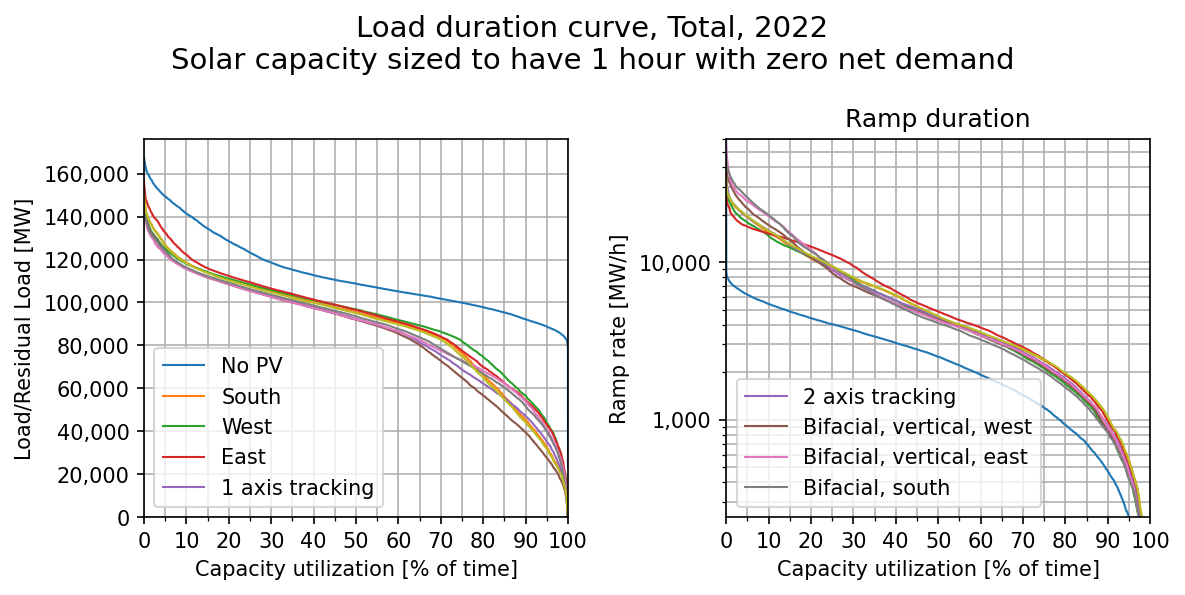

In [42]:
# Load duration curve + ramp duration curve

# Incializamos gráfica
fig, axes = plt.subplots(1, 2)
axes = axes.flatten()
fig.set_facecolor("w")
fig.set_size_inches(8, 4)
fig.set_dpi(150) 

# Iteramos para cada caso
for v in ["Demand"] + track_net_demand[24:]:
    a = df[ [v] ].sort_values( v, ascending = False ).reset_index(drop = True)
    a.index /= 2
    a.index = a.index / a.index.max() * 100
    axes[0].plot(a.index, a[v], linewidth = 1)

# Iteramos para cada caso
max_dt = []
for v in ["Demand_dt"] + track_net_demand_dt[24:]:
    a = np.abs(df[[v]]).sort_values( v,
        ascending = False ).reset_index(drop = True)
    a = a.where(a>0, 0)
    a.index = a.index / a.index.max() * 100
    if v == "Demand_dt": min_dt = np.round(a.iloc[8322]).values[0]
    max_dt.append(a.iloc[0].values[0])
    axes[1].plot(a.index, a[v], linewidth = 1)
max_exp = np.ceil(np.log10(max(max_dt)))

# Formato de gráfica
axes[0].legend( ["No PV"] + names_dn[:4] + ["_"]*4, ncol = 1 )
axes[1].set_title("Load duration")
axes[0].set_xlim(0, 100)
axes[0].set_ylim(0)
axes[0].grid("both", "both")
axes[0].xaxis.set_major_locator(plt.MultipleLocator(10))
axes[0].xaxis.set_minor_locator(plt.MultipleLocator(5))
#axes[0].yaxis.set_major_locator(plt.MultipleLocator(1000))
#axes[0].yaxis.set_minor_locator(plt.MultipleLocator(500))
axes[0].yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))
axes[0].set_ylabel("Load/Residual Load [MW]")
axes[0].set_xlabel("Capacity utilization [% of time]")

# Formato de gráfica
axes[1].legend( ["_"]*4 + names_dn[4:], ncol = 1, loc = "lower left" )
axes[1].set_title("Ramp duration")
axes[1].set_yscale("log")
axes[1].set_xlim(0, 100)
axes[1].set_ylim(min_dt,
    (np.ceil(max(max_dt) / 10**(max_exp-1))) * 10**(max_exp-1) )
axes[1].grid("both", "both")
axes[1].xaxis.set_major_locator(plt.MultipleLocator(10))
axes[1].xaxis.set_minor_locator(plt.MultipleLocator(5))
axes[1].yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))
axes[1].set_ylabel("Ramp rate [MW/h]")
axes[1].set_xlabel("Capacity utilization [% of time]")

fig.suptitle(f"Load duration curve, {reg}, 2022\n"
    + "Solar capacity sized to have 1 hour with zero net demand",
    fontsize = 14)
fig.tight_layout()
plt.show()